In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#mit command option shift p und open active bekommt man seperate window

# Load Data

In [2]:
df=pd.read_csv("relationship_advise_comments_18.csv",sep=";",index_col=[0])

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,3,11,12,13,15,16,17,22,24,27,28,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 3058


# General EDA

In [3]:
df.head()

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,body,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_flair_richtext,author_flair_type,author_patreon_flair,author_cakeday
0,False,[deleted],NaN,NaN,NaN,NaN,NaN,dark,NaN,[deleted],...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,NaN,NaN,NaN
1,False,antioch75,1345763651.0,NaN,NaN,NaN,NaN,NaN,t2_8rmwx,What the heck does this girl offer you that yo...,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,[],text,False,NaN
2,False,iderptagee,1513692602.0,NaN,NaN,NaN,NaN,NaN,t2_1yo57g2,"Cut your losses man, chances are it's not your...",...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,[],text,False,NaN
3,False,-sxlxmxn-,1527703808.0,NaN,NaN,NaN,NaN,NaN,t2_1h5qm8b0,I can't believe this is actually genuine. She ...,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,[],text,False,NaN
4,False,beezykr,1420198156.0,NaN,NaN,NaN,NaN,NaN,t2_kgi10,"bruh wtf ""all of our problems revolve around y...",...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,[],text,False,NaN


In [4]:
df.tail()

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,body,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_flair_richtext,author_flair_type,author_patreon_flair,author_cakeday
267488,False,Scarecrow1779,1414254256.0,NaN,NaN,NaN,NaN,NaN,t2_j1iw4,I just got to read some of your other comments...,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,[],text,False,NaN
267489,False,asafeone,1535527608.0,NaN,NaN,NaN,NaN,NaN,t2_21x1560z,Oh ! You see how easy life would've been if yo...,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,[],text,False,NaN
267490,False,FubbleTub,1542435246.0,NaN,NaN,NaN,NaN,NaN,t2_2m4rfhu0,She sounds like she’s conflicted with her emot...,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,[],text,False,NaN
267491,False,foreverinfinate,1421086072.0,NaN,NaN,NaN,NaN,NaN,t2_ko6iq,You def need therapy. Youre all about the chas...,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,[],text,False,NaN
267492,False,athrowaw312,1543615568.0,NaN,NaN,NaN,NaN,NaN,t2_2p638ymb,Two days of the conversation were very 'lovey ...,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,[],text,False,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267496 entries, 0 to 267492
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   archived                       267496 non-null  bool   
 1   author                         267496 non-null  object 
 2   author_created_utc             240562 non-null  object 
 3   author_flair_background_color  0 non-null       float64
 4   author_flair_css_class         3 non-null       float64
 5   author_flair_template_id       7608 non-null    object 
 6   author_flair_text              7992 non-null    object 
 7   author_flair_text_color        34929 non-null   object 
 8   author_fullname                240562 non-null  object 
 9   body                           267493 non-null  object 
 10  can_gild                       267493 non-null  object 
 11  can_mod_post                   267493 non-null  object 
 12  collapsed                      2674

In [6]:
df.isnull().sum() 

archived                              0
author                                0
author_created_utc                26934
author_flair_background_color    267496
author_flair_css_class           267493
author_flair_template_id         259888
author_flair_text                259504
author_flair_text_color          232567
author_fullname                   26934
body                                  3
can_gild                              3
can_mod_post                          3
collapsed                             3
collapsed_reason                 261844
controversiality                      3
created_utc                           3
distinguished                    267272
edited                                3
gilded                                3
gildings                              3
id                                    3
is_submitter                          3
link_id                               3
no_follow                             3
parent_id                             3


In [7]:
df.describe()

,author_flair_background_color,author_flair_css_class,gilded,score
count,0.0,3.0,267493.000000,267490.000000
mean,NaN,0.0,0.000550,12.089185
std,NaN,0.0,0.122085,236.301924
min,NaN,0.0,0.000000,-679.000000
25%,NaN,0.0,0.000000,1.000000
50%,NaN,0.0,0.000000,1.000000
75%,NaN,0.0,0.000000,3.000000
max,NaN,0.0,58.000000,57186.000000


In [8]:
df.columns

Index(['archived', 'author', 'author_created_utc',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_fullname', 'body', 'can_gild',
       'can_mod_post', 'collapsed', 'collapsed_reason', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id',
       'is_submitter', 'link_id', 'no_follow', 'parent_id', 'permalink',
       'removal_reason', 'retrieved_on', 'score', 'send_replies', 'stickied',
       'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'author_flair_richtext', 'author_flair_type',
       'author_patreon_flair', 'author_cakeday'],
      dtype='object')

# One Feature EDA

# Controversialty

0             228056
0              31751
1               6672
1               1011
t3_9vftf1          1
t1_e9bun74         1
t1_e9utuca         1
Name: controversiality, dtype: int64


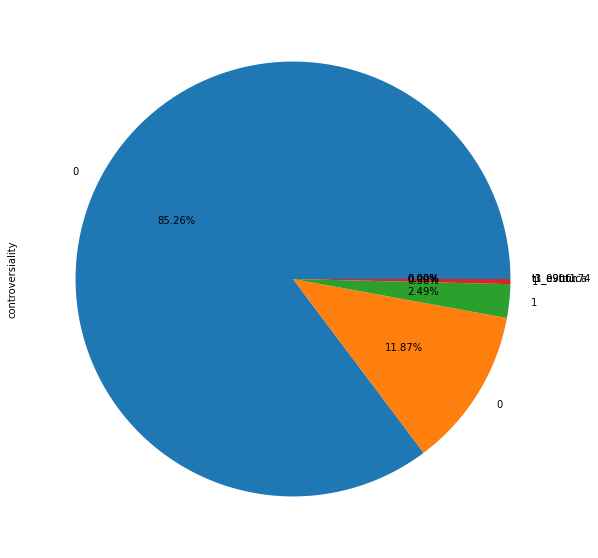

In [9]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [10]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')

In [14]:
df[df['controversiality'].isna()]["created_utc"]

72365     NaN
72430     NaN
145007    NaN
Name: created_utc, dtype: object

In [15]:
df = df.dropna(subset=['controversiality'])

In [16]:
df["controversiality"].unique()

array(['0', '1', 't3_9vftf1', 't1_e9bun74', 't1_e9utuca'], dtype=object)

In [20]:
zu_loeschende_werte = ['t3_9vftf1', 't1_e9bun74', 't1_e9utuca']

# Lösche Zeilen, die einen der zu löschenden Werte in 'controversiality' haben
df = df[~df['controversiality'].isin(zu_loeschende_werte)]

In [21]:
# Liste der gesuchten Werte
gesuchte_werte = ['t3_9vftf1', 't1_e9bun74', 't1_e9utuca']

# Zeilen anzeigen, die einen der gesuchten Werte in 'controversiality' haben
df[df['controversiality'].isin(gesuchte_werte)]["body"]

Series([], Name: body, dtype: object)

In [22]:
df["controversiality"].unique()

array(['0', '1'], dtype=object)

0    259807
1      7683
Name: controversiality, dtype: int64


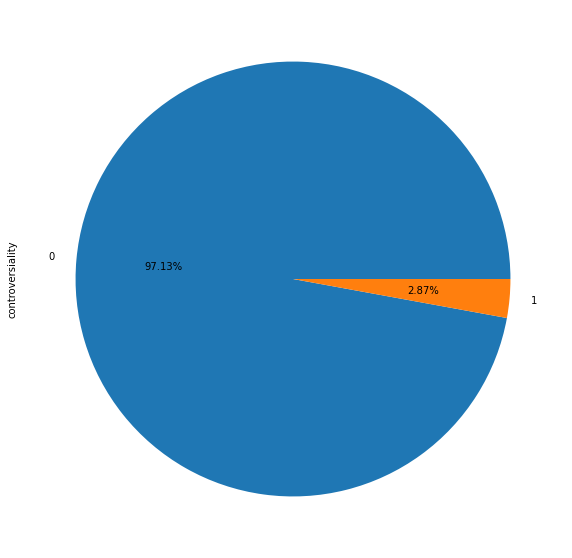

In [23]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

False    267450
True         40
Name: stickied, dtype: int64


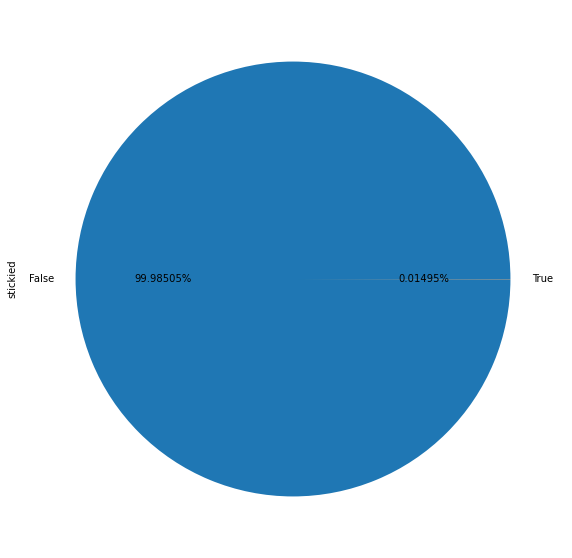

In [24]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [25]:
df["stickied"].unique()

array([False, True], dtype=object)

In [26]:
df['stickied'] = df['stickied'].replace(False, "0")
df['stickied'] = df['stickied'].replace(True, "1")

In [27]:
df["stickied"].unique()

array(['0', '1'], dtype=object)

0    267450
1        40
Name: stickied, dtype: int64


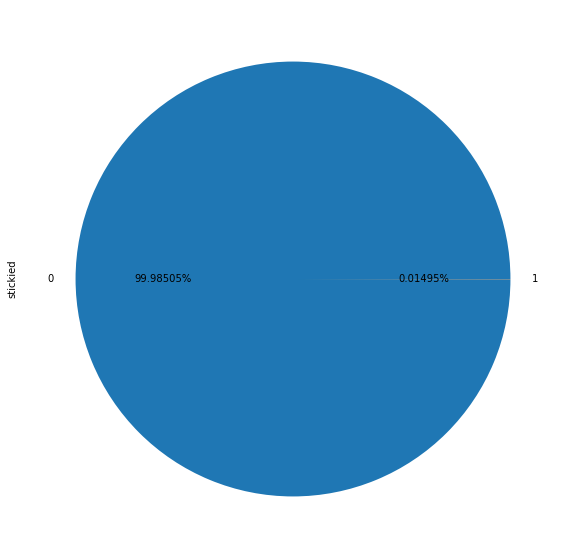

In [28]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [29]:
df["stickied"].unique()

array(['0', '1'], dtype=object)

# Link_id

t3_9worjk    6896
t3_9t6ckc    5436
t3_a03zh9    4850
t3_9xk31d    4338
t3_9xbplh    3848
             ... 
t3_9w0wkf       1
t3_9w0xk6       1
t3_9t6d6t       1
t3_9w0vos       1
t3_a1xk05       1
Name: link_id, Length: 18422, dtype: int64


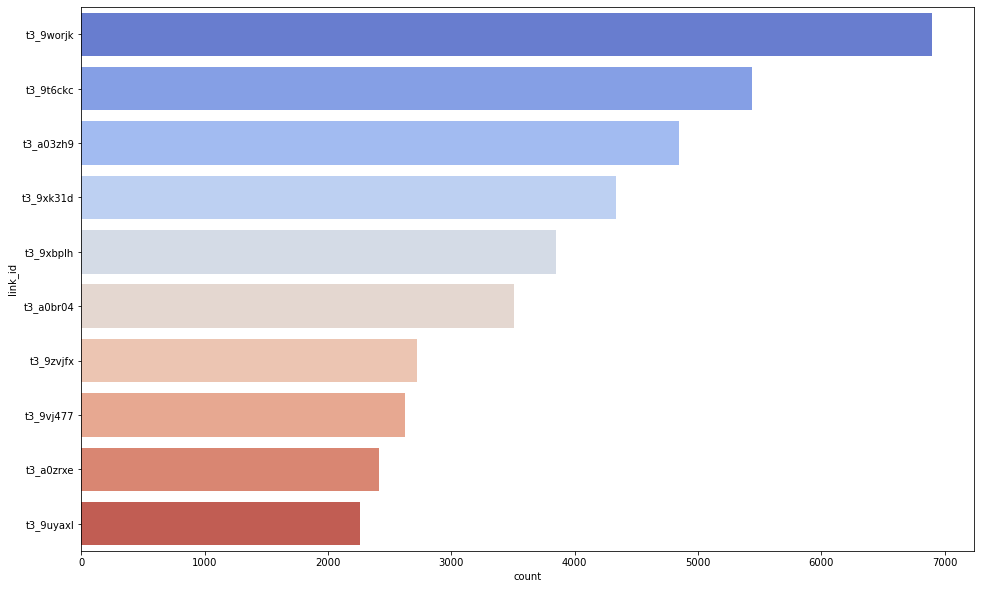

In [30]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [31]:
df[df['link_id'].isna()]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,body,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_flair_richtext,author_flair_type,author_patreon_flair,author_cakeday


# Subreddit_id

t5_2r0cn    267490
Name: subreddit_id, dtype: int64


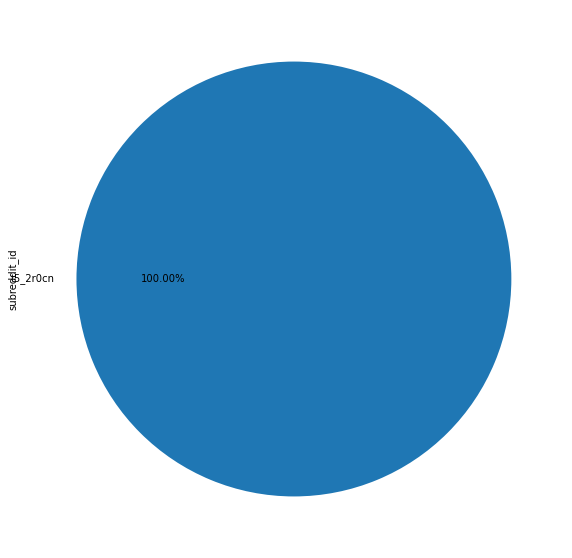

In [32]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 

In [33]:
df[df['subreddit_id'].isna()]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,body,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_flair_richtext,author_flair_type,author_patreon_flair,author_cakeday


# Author

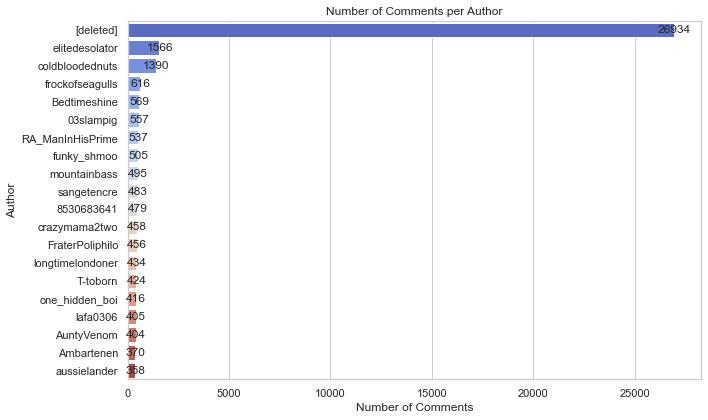

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [35]:
 df[df['author'].str.contains('AutoModerator')]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,body,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_flair_richtext,author_flair_type,author_patreon_flair,author_cakeday


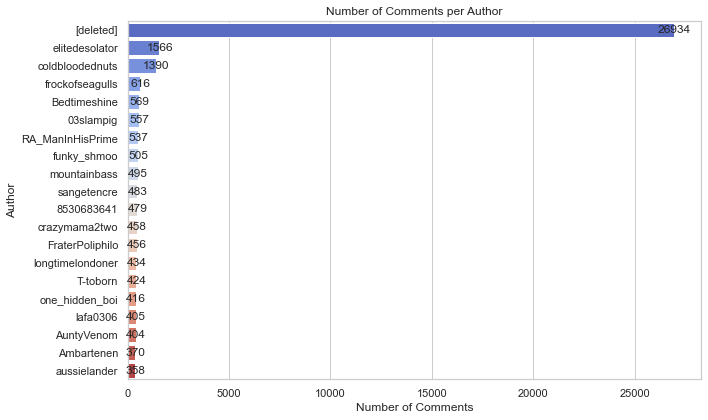

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

# Author flair text

In [37]:
df['author_flair_text'].fillna('0', inplace=True)

0                             259498
Late 20s Male                   2064
Early 30s Male                  1253
50s Male                         721
Teens Male                       552
Early 20s Female                 529
Late 20s Female                  468
40s Male                         439
Late 30s Female                  396
Early 20s Male                   372
Late 30s Male                    229
Early 30s Female                 227
30s Male                         169
Early 40s Male                   100
Early 30s                         94
Early 20s                         82
Teens Female                      73
40s Female                        49
Mid 20s                           48
Late 20s                          41
30s Female                        35
Early 40s Female                  10
40s                                8
Teens                              6
50s Female                         5
60s Male                           4
20s Male                           4
T

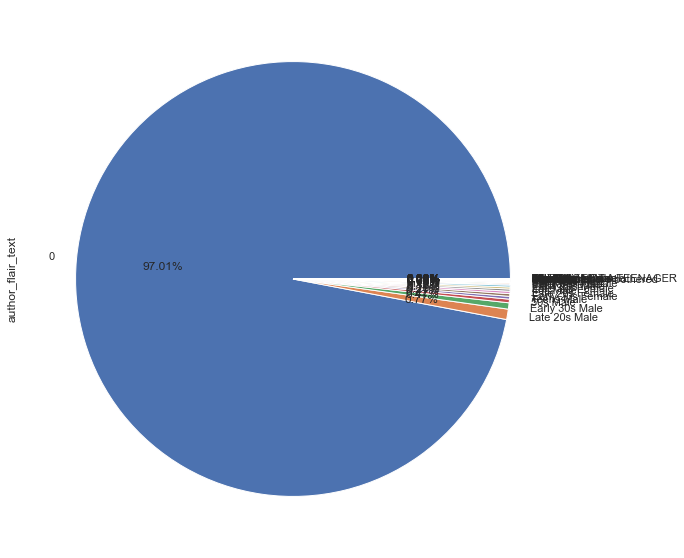

In [38]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationship_advice    267490
Name: subreddit, dtype: int64


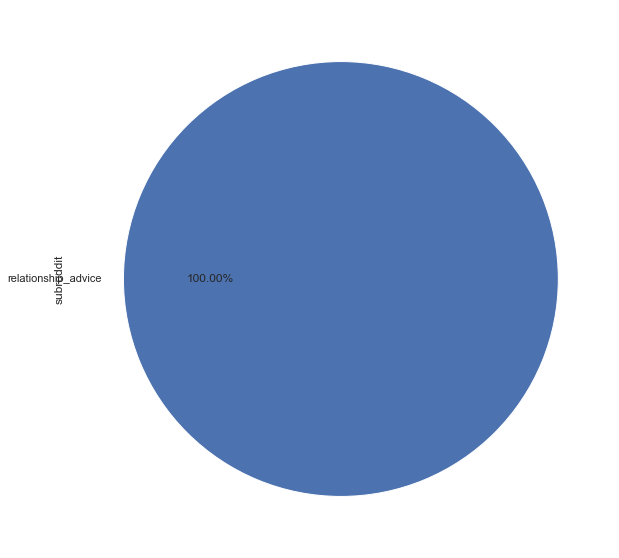

In [39]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [40]:
df[df['subreddit'].isna()]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,body,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_flair_richtext,author_flair_type,author_patreon_flair,author_cakeday


# Created_utc

In [41]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [42]:
df['created_utc']

0        2018-11-01 00:00:05
1        2018-11-01 00:00:09
2        2018-11-01 00:00:22
3        2018-11-01 00:00:42
4        2018-11-01 00:00:46
                 ...        
267488   2018-11-30 23:58:47
267489   2018-11-30 23:59:05
267490   2018-11-30 23:59:32
267491   2018-11-30 23:59:36
267492   2018-11-30 23:59:49
Name: created_utc, Length: 267490, dtype: datetime64[ns]

In [43]:
df[df['created_utc'].isna()]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,body,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_flair_richtext,author_flair_type,author_patreon_flair,author_cakeday


# Hours

Text(0, 0.5, 'Anzahl der Kommentare')

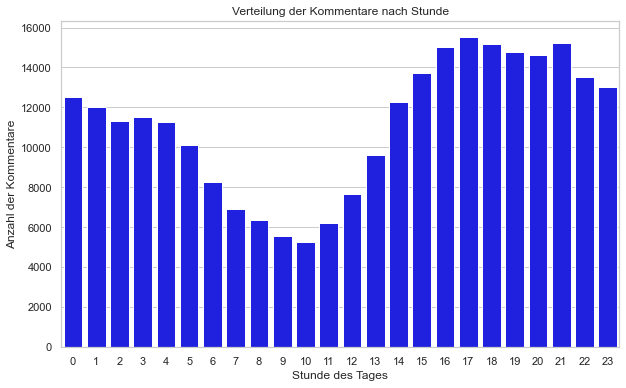

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

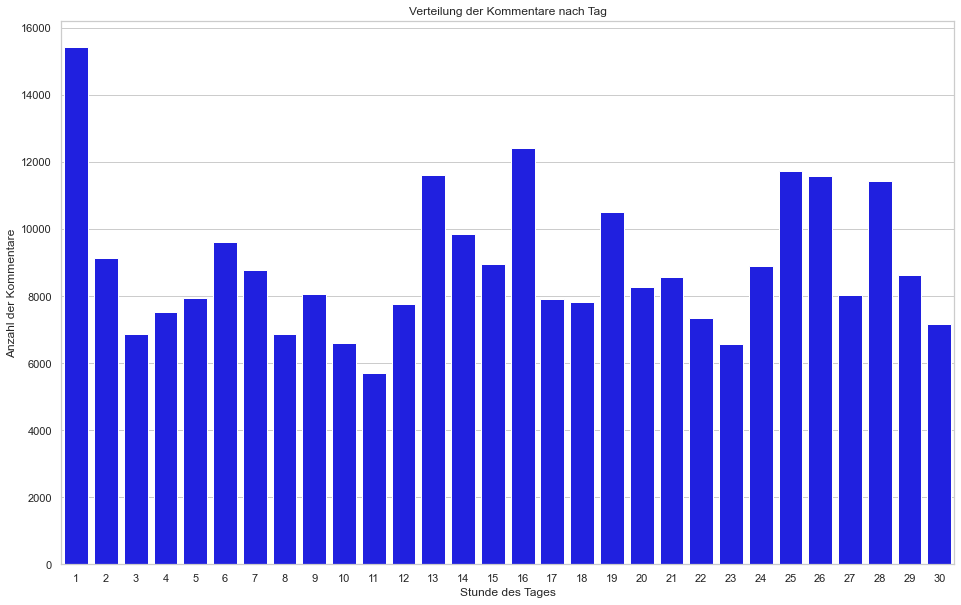

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

In [46]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [47]:
df['created_year'].unique()

array([2018])

# Gilded

0.0    267434
1.0        51
3.0         2
2.0         2
4.0         1
Name: gilded, dtype: int64


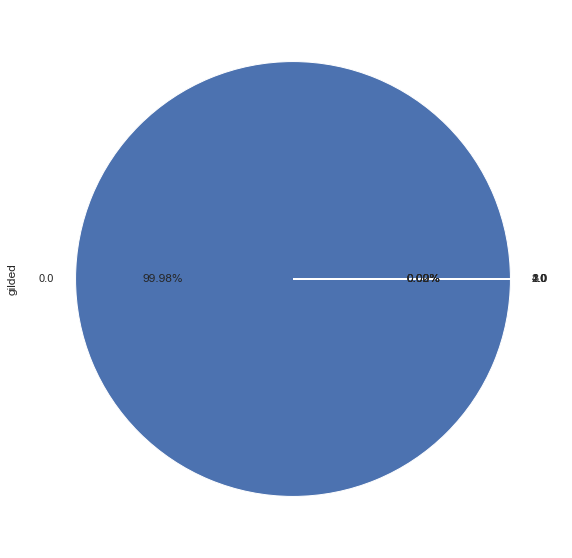

In [48]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

In [49]:
df["gilded"].unique()

array([0., 3., 1., 2., 4.])

In [50]:
df["gilded"] = df["gilded"].replace(0,"0")
df["gilded"] = df["gilded"].replace(1, "1")
df["gilded"] = df["gilded"].replace(2, "2")
df["gilded"] = df["gilded"].replace(3, "3")
df["gilded"] = df["gilded"].replace(4, "4")

0    267434
1        51
3         2
2         2
4         1
Name: gilded, dtype: int64


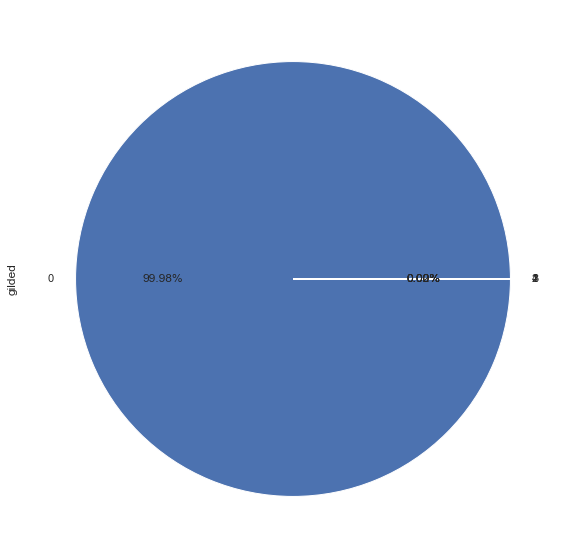

In [51]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

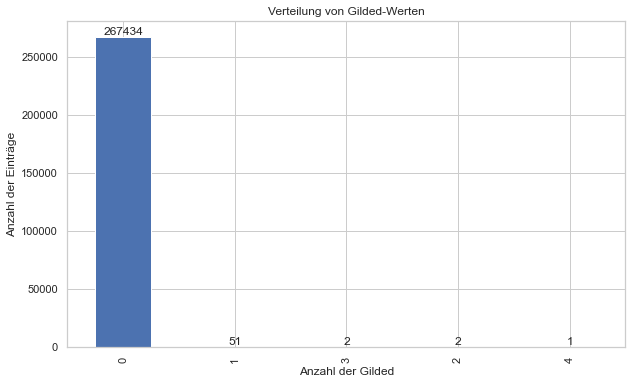

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Distinguished

In [53]:
df['distinguished'].fillna('0', inplace=True)

0            267266
moderator       224
Name: distinguished, dtype: int64


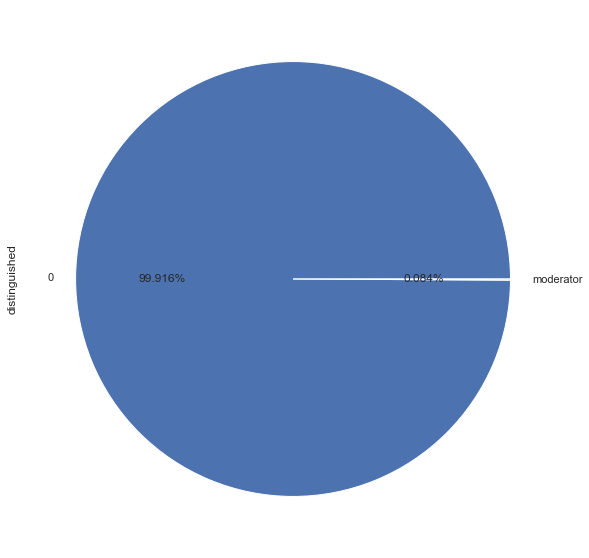

In [54]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [55]:
df["distinguished"].unique()

array(['0', 'moderator'], dtype=object)

In [65]:
 df[df['distinguished'].str.contains('moderator')]["body"].head(50)

10643     Hey, /u/amn1225, message us (/r/relationship_a...
10992     Mitigating the risk of karma-farming. As best ...
10998     [Answered for /u/I_Kan_Spel here](https://www....
12361     People (and the site) trust your submissions m...
12512     /u/gallowboob's account would trade for a dece...
12914     Oh I did get a lot of offers in my time. I dou...
14483     https://www.reddit.com/r/relationship_advice/c...
36655     /u/awgdawgkukfag: **Your account is shadowbann...
36661     Your post has been removed for using insulting...
38319     /u/tie_my_shoe: **Your account is shadowbanned...
39626     I'm abusing mod tags to *comment on one very n...
39710     &gt; Fortunately for everybody living in this ...
39815     If a person has sex with another person under ...
45471                                                   Bye
45491     [OP was banned for these comments](https://i.i...
45532     &gt; I said I was going to cum and she acted l...
45860     Your post has been removed for

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_15084/2094871124.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['first_sentence'] = filtered_df['body'].apply(lambda x: re.split(r'[.!?]', x)[0].strip())


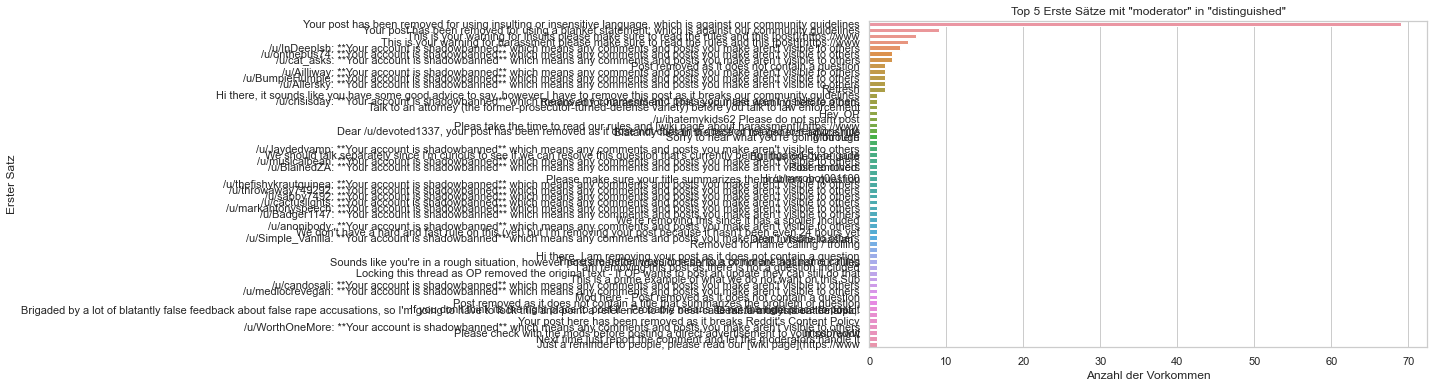

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Annahme: df enthält bereits die relevanten Daten
# df = pd.read_csv('deine_datei.csv')  # Falls deine Daten aus einer Datei geladen werden müssen

# Schritte 1 und 2: Filtere die relevanten Zeilen und extrahiere den ersten Satz
filtered_df = df[df['distinguished'].str.contains('moderator')]
filtered_df['first_sentence'] = filtered_df['body'].apply(lambda x: re.split(r'[.!?]', x)[0].strip())

# Schritt 3: Erstelle eine Liste der top 5 Einträge basierend auf dem ersten Satz
top_5_first_sentences = filtered_df['first_sentence'].value_counts().head(55)

# Schritt 4: Erstelle das Count-Plot für die top 5
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_first_sentences.values, y=top_5_first_sentences.index, orient='h')
plt.xlabel('Anzahl der Vorkommen')
plt.ylabel('Erster Satz')
plt.title('Top 5 Erste Sätze mit "moderator" in "distinguished"')
plt.show()


In [66]:
df = df[df['distinguished'] != 'moderator']

0    267266
Name: distinguished, dtype: int64


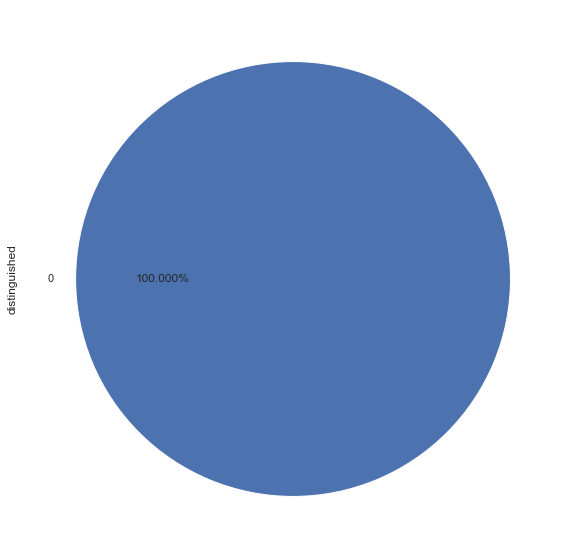

In [72]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267266 entries, 0 to 267492
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   archived                       267266 non-null  bool          
 1   author                         267266 non-null  object        
 2   author_created_utc             240332 non-null  object        
 3   author_flair_background_color  0 non-null       float64       
 4   author_flair_css_class         0 non-null       float64       
 5   author_flair_template_id       7605 non-null    object        
 6   author_flair_text              267266 non-null  object        
 7   author_flair_text_color        34831 non-null   object        
 8   author_fullname                240332 non-null  object        
 9   body                           267263 non-null  object        
 10  can_gild                       267266 non-null  object        
 11  can_m

# Edited

In [68]:
df["edited"].unique()

array(['False', '1541894610', '1541032084', ..., '1543621868',
       '1543622354', '1543623836'], dtype=object)

In [69]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111', "1")
df['edited'] = df['edited'].replace('False', "0")

In [70]:
df["edited"].unique()

array(['0', '1'], dtype=object)

0    258367
1      8899
Name: edited, dtype: int64


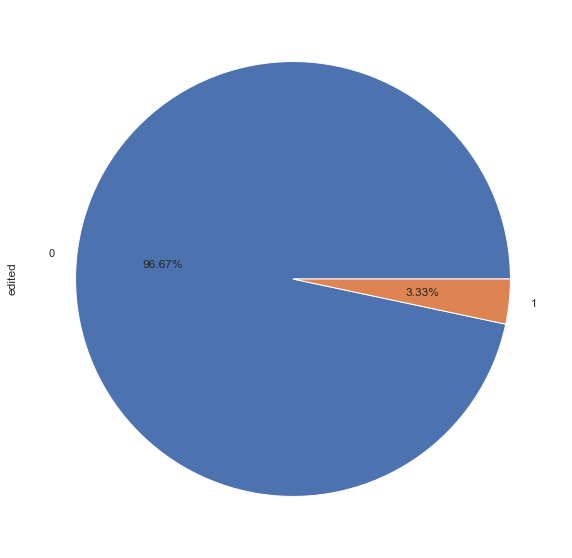

In [71]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [73]:
df[df['edited'].isna()]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,body,...,subreddit_id,subreddit_name_prefixed,subreddit_type,author_flair_richtext,author_flair_type,author_patreon_flair,author_cakeday,created_hour,created_day,created_year


# Score

In [74]:
df["score"].value_counts()

 1.0       106824
 2.0        48433
 3.0        23030
 0.0        13279
 4.0         9275
            ...  
-133.0          1
 2289.0         1
 922.0          1
 499.0          1
 6142.0         1
Name: score, Length: 1234, dtype: int64

In [75]:
df['score'] = df["score"].astype(int)

In [76]:
df["score"].mean()

12.09639834472024

In [77]:
df.describe()

,author_flair_background_color,author_flair_css_class,score,created_hour,created_day,created_year
count,0.0,0.0,267266.000000,267266.000000,267266.000000,267266.0
mean,NaN,NaN,12.096398,12.509511,15.531628,2018.0
std,NaN,NaN,236.400401,7.309416,8.815381,0.0
min,NaN,NaN,-679.000000,0.000000,1.000000,2018.0
25%,NaN,NaN,1.000000,5.000000,8.000000,2018.0
50%,NaN,NaN,1.000000,14.000000,16.000000,2018.0
75%,NaN,NaN,3.000000,19.000000,24.000000,2018.0
max,NaN,NaN,57186.000000,23.000000,30.000000,2018.0


In [78]:
df.isnull().sum() 

archived                              0
author                                0
author_created_utc                26934
author_flair_background_color    267266
author_flair_css_class           267266
author_flair_template_id         259661
author_flair_text                     0
author_flair_text_color          232435
author_fullname                   26934
body                                  3
can_gild                              0
can_mod_post                          0
collapsed                             0
collapsed_reason                 261617
controversiality                      0
created_utc                           0
distinguished                         0
edited                                0
gilded                                0
gildings                              0
id                                    0
is_submitter                          0
link_id                               0
no_follow                             0
parent_id                             0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267266 entries, 0 to 267492
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   archived                       267266 non-null  bool          
 1   author                         267266 non-null  object        
 2   author_created_utc             240332 non-null  object        
 3   author_flair_background_color  0 non-null       float64       
 4   author_flair_css_class         0 non-null       float64       
 5   author_flair_template_id       7605 non-null    object        
 6   author_flair_text              267266 non-null  object        
 7   author_flair_text_color        34831 non-null   object        
 8   author_fullname                240332 non-null  object        
 9   body                           267263 non-null  object        
 10  can_gild                       267266 non-null  object        
 11  can_m

# Two Feature Analyses

# Hours vs score

<AxesSubplot:xlabel='created_hour', ylabel='score'>

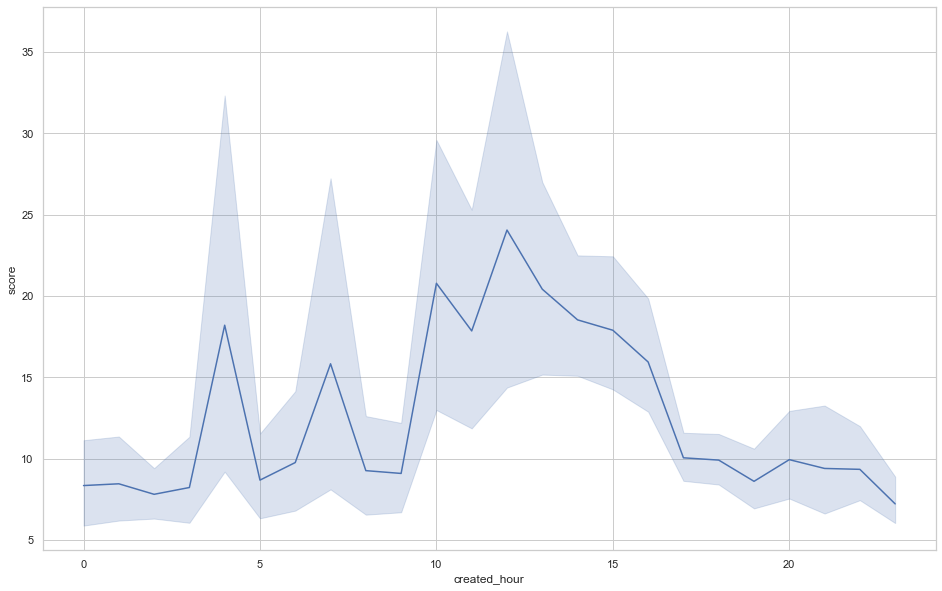

In [80]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs score

<AxesSubplot:xlabel='created_day', ylabel='score'>

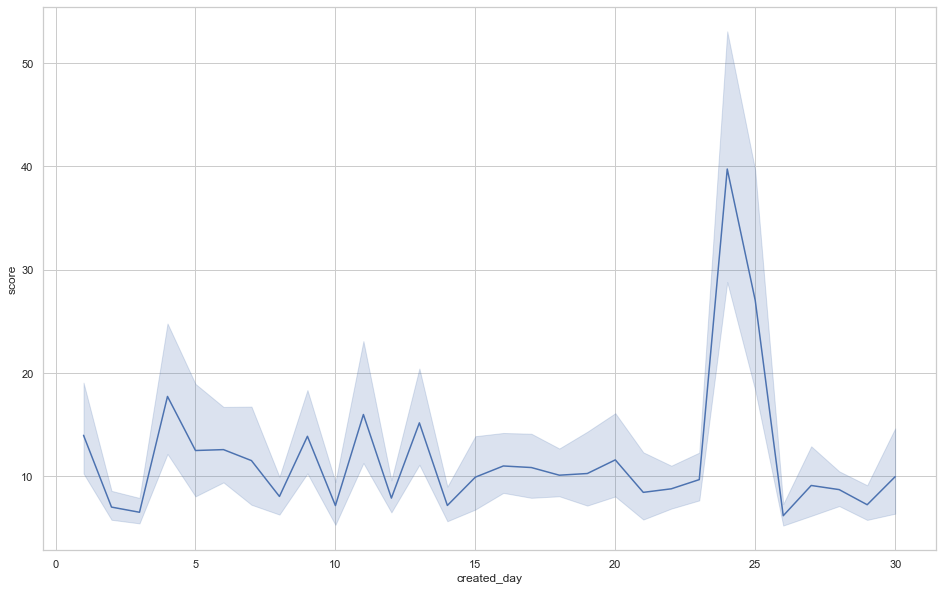

In [81]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

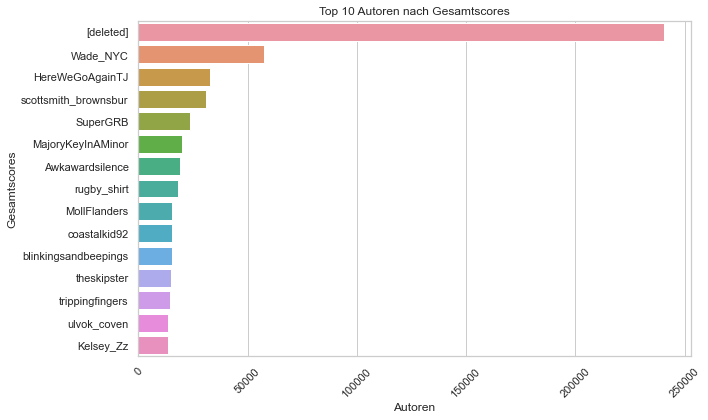

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

# Ohne Deleted

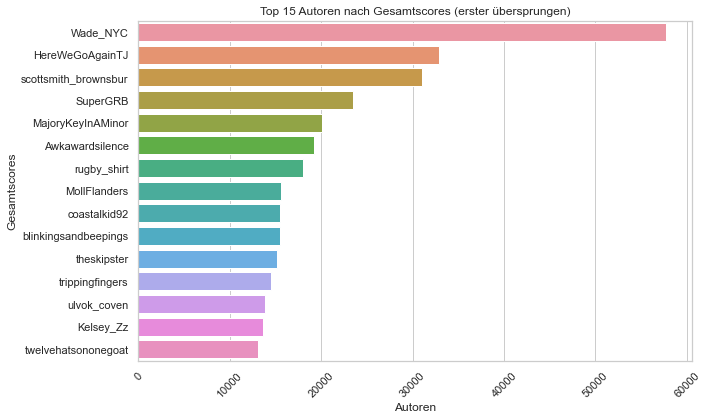

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Column removing

In [87]:
df=df.drop(["author_flair_css_class", "subreddit","retrieved_on","subreddit_id","is_submitter","subreddit_type","author_cakeday","permalink"], axis = 1)

In [88]:
df.isnull().sum() 

archived                              0
author                                0
author_created_utc                26934
author_flair_background_color    267266
author_flair_template_id         259661
author_flair_text                     0
author_flair_text_color          232435
author_fullname                   26934
body                                  3
can_gild                              0
can_mod_post                          0
collapsed                             0
collapsed_reason                 261617
controversiality                      0
created_utc                           0
distinguished                         0
edited                                0
gilded                                0
gildings                              0
id                                    0
link_id                               0
no_follow                             0
parent_id                             0
removal_reason                   267266
score                                 0


In [89]:
df=df.drop(["author_flair_background_color","collapsed","collapsed_reason","send_replies"], axis = 1)

In [92]:
df=df.drop(["archived"], axis = 1)

In [94]:
df.columns

Index(['author', 'author_created_utc', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_fullname',
       'body', 'can_gild', 'can_mod_post', 'controversiality', 'created_utc',
       'distinguished', 'edited', 'gilded', 'gildings', 'id', 'link_id',
       'no_follow', 'parent_id', 'removal_reason', 'score', 'stickied',
       'subreddit_name_prefixed', 'author_flair_richtext', 'author_flair_type',
       'author_patreon_flair', 'created_hour', 'created_day', 'created_year'],
      dtype='object')

In [96]:
df=df.drop(["author_created_utc","author_flair_template_id","author_flair_text_color","author_fullname","can_gild","can_mod_post","gildings","no_follow","removal_reason","subreddit_name_prefixed","author_flair_richtext","author_flair_type","author_patreon_flair"], axis = 1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267266 entries, 0 to 267492
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             267266 non-null  object        
 1   author_flair_text  267266 non-null  object        
 2   body               267263 non-null  object        
 3   controversiality   267266 non-null  object        
 4   created_utc        267266 non-null  datetime64[ns]
 5   distinguished      267266 non-null  object        
 6   edited             267266 non-null  object        
 7   gilded             267266 non-null  object        
 8   id                 267266 non-null  object        
 9   link_id            267266 non-null  object        
 10  parent_id          267266 non-null  object        
 11  score              267266 non-null  int64         
 12  stickied           267266 non-null  object        
 13  created_hour       267266 non-null  int64        

# Row Deleting

# Delete all comments that have a NA

In [98]:
df[pd.isna(df['body'])]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
93970,mountainbass,0,NaN,0,2018-11-12 03:51:02,0,1,0,e9j826e,t3_9w96pt,t1_e9j2yv6,2,0,3,12,2018
191640,[deleted],0,NaN,0,2018-11-22 18:15:19,0,1,0,ea8y88j,t3_9zg8nt,t1_ea8wnlo,1,0,18,22,2018
211056,AuntyVenom,0,NaN,0,2018-11-25 04:57:24,0,1,0,eaetfrw,t3_a05q21,t3_a05q21,1,0,4,25,2018


In [99]:
df = df.dropna(subset=['body'])

In [100]:
df.isnull().sum() 

author               0
author_flair_text    0
body                 0
controversiality     0
created_utc          0
distinguished        0
edited               0
gilded               0
id                   0
link_id              0
parent_id            0
score                0
stickied             0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Body Analyses and Preprocessing

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          17729
[removed]                                                                                                                                                                                                                                                                                                                                                                                      

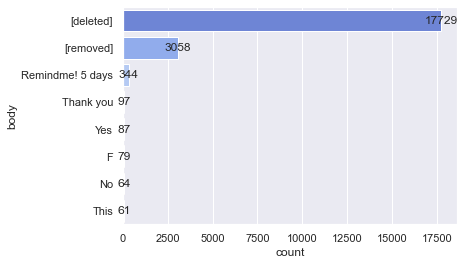

In [101]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben Removed comments mehr likes

In [102]:
filtered_df=df[df['body'] == '[removed]']

In [103]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,3058.000000,3058.000000,3058.000000,3058.0
mean,33.932636,11.387835,12.389797,2018.0
std,521.995445,6.973477,8.372646,0.0
min,-157.000000,0.000000,1.000000,2018.0
25%,1.000000,5.000000,6.000000,2018.0
50%,1.000000,13.000000,9.000000,2018.0
75%,3.000000,17.000000,19.000000,2018.0
max,22327.000000,23.000000,30.000000,2018.0


In [104]:
len(filtered_df)

3058

Text(0.5, 1.0, 'Histogramm der Scores')

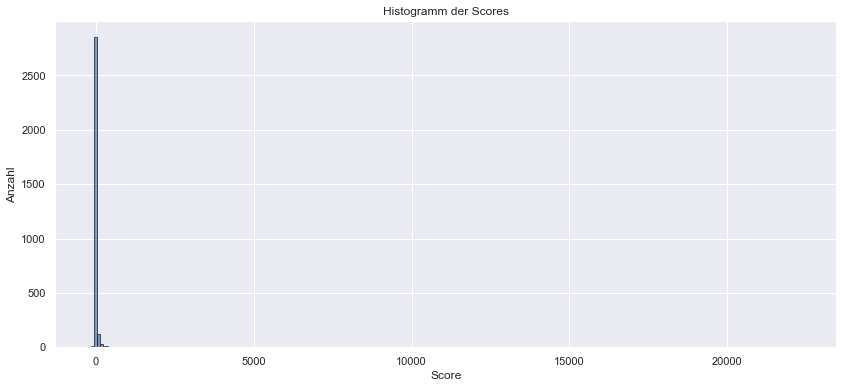

In [105]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

removed Kommentare löschen

In [106]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          17729
Remindme! 5 days                                                                                                                                                                                                                                                                                                                                                                               

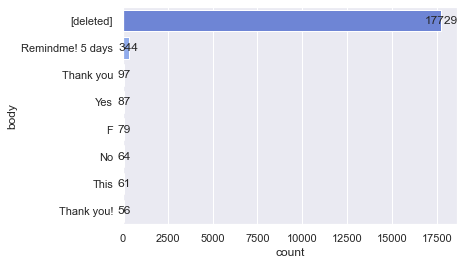

In [107]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben Deleted comments mehr likes

In [108]:
filtered_df_del=df[df['body'] == '[deleted]']

In [109]:
filtered_df_del

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
0,[deleted],0,[deleted],0,2018-11-01 00:00:05,0,0,0,e8tkibi,t3_9syk5p,t3_9syk5p,-2,0,0,1,2018
14,[deleted],0,[deleted],0,2018-11-01 00:02:57,0,1,0,e8tkoke,t3_9t4ej0,t3_9t4ej0,7,0,0,1,2018
24,[deleted],0,[deleted],0,2018-11-01 00:03:35,0,0,0,e8tkpxa,t3_9sl5wd,t1_e8qxld2,1,0,0,1,2018
29,[deleted],0,[deleted],0,2018-11-01 00:04:06,0,0,0,e8tkr0f,t3_9t4b77,t3_9t4b77,1,0,0,1,2018
83,[deleted],0,[deleted],0,2018-11-01 00:09:08,0,0,0,e8tl1q3,t3_9qxqzn,t3_9qxqzn,1,0,0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267449,[deleted],0,[deleted],0,2018-11-30 23:49:27,0,0,0,eatlf9z,t3_a1xc3y,t3_a1xc3y,7,0,23,30,2018
267453,[deleted],0,[deleted],0,2018-11-30 23:50:34,0,0,0,eatlhv3,t3_a1wl21,t1_eathxyg,2,0,23,30,2018
267480,[deleted],0,[deleted],0,2018-11-30 23:56:50,0,0,0,eatlvxp,t3_a1utvp,t3_a1utvp,1,0,23,30,2018
267483,[deleted],0,[deleted],0,2018-11-30 23:57:33,0,0,0,eatlxlr,t3_a1xv9n,t3_a1xv9n,-1,0,23,30,2018


In [110]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,17729.000000,17729.000000,17729.000000,17729.0
mean,4.379209,12.585933,15.580913,2018.0
std,87.195575,7.312477,8.718433,0.0
min,-679.000000,0.000000,1.000000,2018.0
25%,1.000000,5.000000,8.000000,2018.0
50%,1.000000,14.000000,16.000000,2018.0
75%,2.000000,19.000000,23.000000,2018.0
max,9492.000000,23.000000,30.000000,2018.0


In [111]:
len(filtered_df_del)


17729

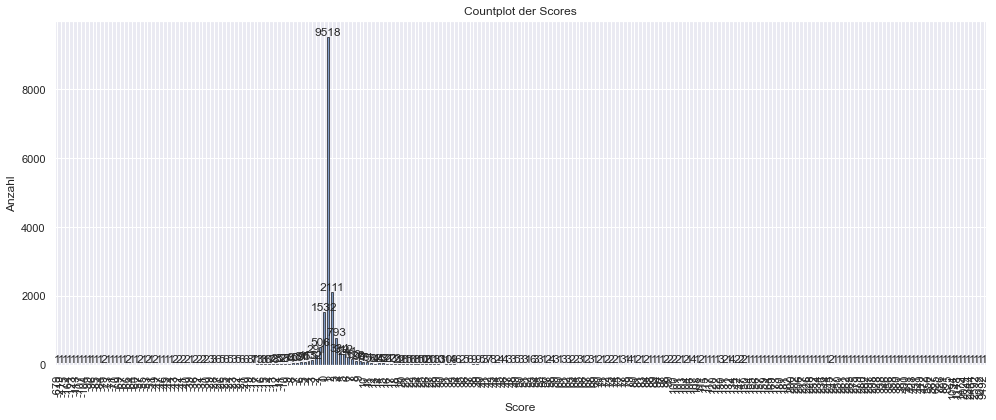

In [112]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')
plt.tight_layout()
# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Kommentare die deleted wurden löschen

In [113]:
df = df[df['body'] != '[deleted]']

Remindme! 5 days                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   344
Thank you                                                                                                                                                                                                                                                                                                                                                                                        

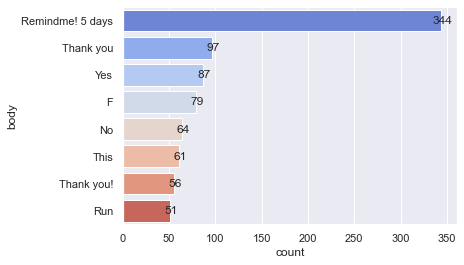

In [114]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [116]:
df[df['body'] == "."]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
85613,Armando_Munoz,0,.,0,2018-11-10 18:52:57,0,0,0,e9fnlue,t3_9vlmbb,t3_9vlmbb,0,0,18,10,2018
112621,justNotherrestless,0,.,0,2018-11-14 00:56:20,0,1,0,e9nibke,t3_9worjk,t1_e9ncax4,-1,0,0,14,2018
122315,sierra_aviator,0,.,0,2018-11-15 01:38:37,0,0,0,e9pwv20,t3_9x2029,t3_9x2029,-2,0,1,15,2018
164232,snuggeto,0,.,0,2018-11-19 15:52:55,0,0,0,ea1fb2e,t3_9yc4z9,t3_9yc4z9,1,0,15,19,2018
205758,mippnles,0,.,0,2018-11-24 18:22:55,0,0,0,eadja0q,t3_9zvjfx,t3_9zvjfx,1,0,18,24,2018
208958,lucuma,0,.,0,2018-11-24 23:58:55,0,1,0,eae9xod,t3_9zzhvi,t3_9zzhvi,2,0,23,24,2018
219198,[deleted],0,.,0,2018-11-25 21:50:08,0,1,0,eagnwuz,t3_a0crtj,t3_a0crtj,1,0,21,25,2018


In [117]:
df = df[df['body'] != '.']

In [118]:
df[df['body'] == "."]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [119]:
df[df['body'] == "Remindme! 5 days"]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
17778,hyp0xia,0,Remindme! 5 days,0,2018-11-02 04:32:37,0,0,0,e8w94it,t3_9sl5wd,t3_9sl5wd,1,0,4,2,2018
217853,dey_turk_our_joorbs,0,Remindme! 5 days,0,2018-11-25 19:54:36,0,1,0,eagdkr9,t3_a03zh9,t3_a03zh9,1,0,19,25,2018
219929,xlydss,0,Remindme! 5 days,0,2018-11-25 22:59:43,0,0,0,eagta4q,t3_a0br04,t1_eagny84,1,0,22,25,2018
220122,abeazacha,0,Remindme! 5 days,0,2018-11-25 23:15:37,0,0,0,eaguhwi,t3_a0br04,t1_eagny84,1,0,23,25,2018
220269,Ichuu2,0,Remindme! 5 days,0,2018-11-25 23:26:50,0,0,0,eagvcsm,t3_a0br04,t1_eagny84,1,0,23,25,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231853,Naturallyilldefined,0,Remindme! 5 days,0,2018-11-26 23:05:46,0,0,0,eaj97zc,t3_a0br04,t1_eagny84,1,0,23,26,2018
231931,gar0796,0,Remindme! 5 days,0,2018-11-26 23:13:34,0,0,0,eaj9rqg,t3_a0br04,t1_eagny84,1,0,23,26,2018
234980,xfullxofxbeansx,0,Remindme! 5 days,0,2018-11-27 07:21:09,0,0,0,eak2eqr,t3_a0br04,t1_eagny84,1,0,7,27,2018
255356,ibsbibbit,0,Remindme! 5 days,0,2018-11-29 08:12:08,0,0,0,eapclmd,t3_a0br04,t1_eagny84,1,0,8,29,2018


In [120]:
df = df[df['body'] != 'Remindme! 5 days']

In [121]:
df[df['body'] == "F"]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
3691,macbem,0,F,0,2018-11-01 08:33:11,0,0,0,e8u75da,t3_9syk5p,t1_e8tfom1,2,0,8,1,2018
7268,TechnoWolfy30,0,F,0,2018-11-01 15:12:55,0,0,0,e8up004,t3_9ta9k8,t3_9ta9k8,-1,0,15,1,2018
15174,neessoo,0,F,0,2018-11-01 23:38:19,0,0,0,e8vqixv,t3_9tep16,t1_e8vqh6l,1,0,23,1,2018
22950,PayRespects-Bot,0,F,0,2018-11-02 19:58:22,0,0,0,e8xmhe0,t3_9tncn6,t1_e8xmh4r,2,0,19,2,2018
23081,SwarthyManatee,0,F,0,2018-11-02 20:21:58,0,0,0,e8xoffv,t3_9tncn6,t1_e8xmh4r,2,0,20,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226788,sennu2,0,F,0,2018-11-26 13:19:54,0,0,0,eai09nn,t3_a0br04,t1_eahn1op,1,0,13,26,2018
226789,RespondsWithFBot,0,F,0,2018-11-26 13:19:56,0,0,0,eai09pj,t3_a0br04,t1_eai09nn,2,0,13,26,2018
226790,RespondsWithFBot,0,F,0,2018-11-26 13:20:04,0,0,0,eai09yl,t3_a0br04,t1_eai09nn,2,0,13,26,2018
243350,RespondsWithFBot,0,F,0,2018-11-28 07:07:05,0,0,0,eamk27w,t3_a13lp2,t1_eamk24t,1,0,7,28,2018


In [122]:
df = df[df['body'] != 'F']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          97
Yes                                                                                                                                                                                                                                                                                                                                                                                               

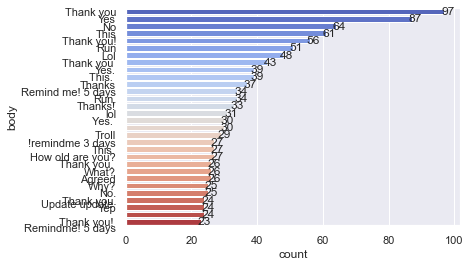

In [125]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:30].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [126]:
df[df['body'].str.contains('Remind me')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
277,DustinoHeat,0,Gonna need an update on this playa. Remind me ...,0,2018-11-01 00:33:28,0,0,0,e8tmhli,t3_9syk5p,t3_9syk5p,1,0,0,1,2018
967,-Acta-Non-Verba-,0,Remind me not to lend you money.,0,2018-11-01 02:03:09,0,0,0,e8trp90,t3_9ssq42,t1_e8seyuo,1,0,2,1,2018
2666,VongolaSora,0,Remind me! 9 months,0,2018-11-01 05:48:22,0,0,0,e8u2hvf,t3_9syk5p,t1_e8tfom1,3,0,5,1,2018
3858,that-guy-jack,0,!Remind me 1 week,0,2018-11-01 09:05:40,0,0,0,e8u7zxt,t3_9syk5p,t3_9syk5p,3,0,9,1,2018
3867,Momps,0,!Remind me 1 week,0,2018-11-01 09:07:45,0,0,0,e8u81wj,t3_9syk5p,t1_e8u7zxt,3,0,9,1,2018
4180,TwoFluffyDogs,0,Remind me in 8 months,0,2018-11-01 10:23:05,0,0,0,e8ua681,t3_9syk5p,t1_e8tg7uq,3,0,10,1,2018
16855,Mgc_rabbit_Hat,0,Remind me! 5 days,0,2018-11-02 02:06:40,0,0,0,e8w0ey1,t3_9sl5wd,t3_9sl5wd,1,0,2,2,2018
27184,Filledquake,0,Remind me,0,2018-11-03 07:26:08,0,0,0,e8yq8j8,t3_9tqose,t3_9tqose,1,0,7,3,2018
75734,bornintheufo,0,Remind me! 6 hours,0,2018-11-09 15:39:01,0,0,0,e9d3a6z,t3_9vj477,t1_e9cxkv8,1,0,15,9,2018
76239,CrayCray6891,0,Remind me,0,2018-11-09 16:42:43,0,0,0,e9d81pa,t3_9vj477,t3_9vj477,1,0,16,9,2018


In [127]:
df = df[~df['body'].str.contains('Remind me')]


In [128]:
df[df['body'].str.contains('Remind me')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [129]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 245988 entries, 1 to 267492
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             245988 non-null  object        
 1   author_flair_text  245988 non-null  object        
 2   body               245988 non-null  object        
 3   controversiality   245988 non-null  object        
 4   created_utc        245988 non-null  datetime64[ns]
 5   distinguished      245988 non-null  object        
 6   edited             245988 non-null  object        
 7   gilded             245988 non-null  object        
 8   id                 245988 non-null  object        
 9   link_id            245988 non-null  object        
 10  parent_id          245988 non-null  object        
 11  score              245988 non-null  int64         
 12  stickied           245988 non-null  object        
 13  created_hour       245988 non-null  int64        

# Http und Http und Redditnames removen

In [130]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

In [131]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
876,SpookiewithdatBootie,0,/r/DeadBedrooms,0,2018-11-01 01:52:29,0,0,0,e8tr31u,t3_9sz2nk,t3_9sz2nk,1,0,1,1,2018
16169,FitQuantity,0,/r/nakedcarebearorgieswithbacon,0,2018-11-02 01:01:47,0,0,0,e8vw17w,t3_9t5skt,t1_e8vafp2,1,0,1,2,2018
22893,SpookiewithdatBootie,0,/r/sex,0,2018-11-02 19:50:57,0,0,0,e8xlu04,t3_9tneeu,t3_9tneeu,0,0,19,2,2018
23999,AuntyVenom,0,/r/deadbedrooms,0,2018-11-02 22:32:27,0,0,0,e8xycml,t3_9tooge,t3_9tooge,1,0,22,2,2018
38082,lonelythrowaway218,Late 20s Female,/r/breakups,0,2018-11-04 21:48:48,0,0,0,e923kl5,t3_9u7ghr,t3_9u7ghr,1,0,21,4,2018
41480,sloretactician,0,/r/legaladvice,0,2018-11-05 07:34:51,0,0,0,e931qda,t3_9ubboe,t3_9ubboe,1,0,7,5,2018
44605,Lost_in_the_jungle_,0,/r/ihavesex,0,2018-11-05 18:51:49,0,0,0,e93zslo,t3_9ucuf3,t3_9ucuf3,1,0,18,5,2018
44972,SpookiewithdatBootie,0,/r/sex,0,2018-11-05 19:16:33,0,0,0,e941ppd,t3_9ug3nt,t3_9ug3nt,1,0,19,5,2018
62424,ndcapital,0,/r/unexpectedanime,0,2018-11-07 18:23:36,0,0,0,e98o10t,t3_9uyaxl,t1_e97z8jj,1,0,18,7,2018
90365,rward617,0,/r/thathappened,0,2018-11-11 17:23:20,0,0,0,e9hqskr,t3_9w47x9,t3_9w47x9,3,0,17,11,2018


In [132]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men.index)

In [133]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
50441,ThegreatwhiteEagle,0,http://buddyvalue.com/?cashid=25698,0,2018-11-06 10:47:14,0,0,0,e95hi7g,t3_9uhwu7,t3_9uhwu7,0,0,10,6,2018


In [134]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_rows.index)

In [135]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
32925,Viverz,0,https://report.cybertip.org/submit,0,2018-11-04 06:28:23,0,0,0,e90qpbv,t3_9u037k,t3_9u037k,1,0,6,4,2018
34730,adifferentwhiteboy,0,https://youtu.be/NJ3uC65NDfo,0,2018-11-04 14:50:56,0,0,0,e9182e8,t3_9u0suj,t3_9u0suj,1,0,14,4,2018
38912,Eatsbakedchicken,0,https://www.urbandictionary.com/define.php?ter...,0,2018-11-04 23:54:27,0,0,0,e92cjb7,t3_9u861x,t1_e92c6bo,2,0,23,4,2018
40612,MMDT,Late 20s Male,https://www.youtube.com/watch?v=My6ZWYldBRI,0,2018-11-05 03:41:32,0,0,0,e92rog1,t3_9ua6qu,t3_9ua6qu,1,0,3,5,2018
48770,suckmytitzbitch,0,https://youtu.be/_SmPXy2dovM,0,2018-11-06 04:31:08,0,0,0,e954cz8,t3_9ul4ew,t3_9ul4ew,1,0,4,6,2018
100834,Sunmoonsunmoon,0,https://m.youtube.com/watch?v=CDmVOW4AWA0,0,2018-11-13 01:44:57,0,0,0,e9lbspe,t3_9wkinc,t3_9wkinc,1,0,1,13,2018
109736,luckyme888,0,https://www.youtube.com/watch?v=tx9_Iw7vXaA,0,2018-11-13 21:56:41,0,0,0,e9n68n9,t3_9worjk,t3_9worjk,1,0,21,13,2018
110450,[deleted],0,https://m.youtube.com/watch?v=YzoMSgBzjsI,0,2018-11-13 22:35:53,0,0,0,e9n92g8,t3_9worjk,t1_e9n8h7a,1,0,22,13,2018
113392,rschloz,0,https://m.youtube.com/watch?v=UfpVY_ZHGDg,0,2018-11-14 01:52:39,0,0,0,e9nlwcr,t3_9worjk,t3_9worjk,3,0,1,14,2018
115175,joebull20,0,https://youtu.be/xOkI2CmD2D8,0,2018-11-14 04:16:30,0,0,0,e9nuqmb,t3_9worjk,t1_e9nu5fq,0,0,4,14,2018


In [136]:
df = df.drop(selected_rows_2.index)

In [137]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [138]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
484,ginger2020,0,r/Iamatotalpieceofshit,0,2018-11-01 01:02:14,0,0,0,e8to6ek,t3_9t01v5,t1_e8tlnuc,19,0,1,1,2018
1610,ysalih12345,0,r/beetlejuicing?,0,2018-11-01 03:20:02,0,0,0,e8tw2k5,t3_9syk5p,t1_e8tmbuc,-1,0,3,1,2018
1869,megative-,0,r/iamverysmart,0,2018-11-01 03:50:04,0,0,0,e8txm26,t3_9syk5p,t1_e8t8dko,3,0,3,1,2018
3589,TurritopsisJellyfish,0,r/iamverysmart,0,2018-11-01 08:16:48,0,0,0,e8u6pz3,t3_9surjl,t1_e8u3z1k,1,0,8,1,2018
3598,IntestinalDelirium,0,r/sex,0,2018-11-01 08:18:27,0,0,0,e8u6ri3,t3_9t7k27,t3_9t7k27,2,0,8,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253763,thirdaccountwhodis,0,r/subsyouthoughtyoufellfor,0,2018-11-29 04:27:17,0,0,0,eap08p6,t3_a14cxf,t1_eaoy4to,3,0,4,29,2018
256094,pippilongjohns,0,r/iamverysmart,0,2018-11-29 10:50:37,0,0,0,eapigo1,t3_a1fvqq,t1_eaph5gp,0,0,10,29,2018
258228,Col_MEEP_MEEP,0,r/quityourbullshit,0,2018-11-29 18:31:05,0,0,0,eaqdlpm,t3_a1j8ns,t1_eaq9cf1,3,0,18,29,2018
258546,floopdedoopdoop,0,r/boneappletea,0,2018-11-29 19:32:03,0,0,0,eaqillf,t3_a1h782,t1_eapt565,7,0,19,29,2018


In [139]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men_two.index)

In [140]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [141]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [142]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
6678,CatDaddy09,0,https://media1.giphy.com/media/IT6kBZ1k5oEeI/g...,0,2018-11-01 14:32:54,0,0,0,e8umbu3,t3_9t6ckc,t1_e8u0ars,1,0,14,1,2018
6904,Skramer94,0,https://www.reddit.com/r/askwomenadvice/commen...,0,2018-11-01 14:47:59,0,0,0,e8unbzf,t3_9ta23g,t3_9ta23g,1,0,14,1,2018
16596,Goodnightfrog,0,https://www.cybercivilrights.org/revenge-porn-...,0,2018-11-02 01:42:11,0,0,0,e8vyr3n,t3_9tflul,t1_e8vxpsa,23,0,1,2,2018
18791,GirlAnon323,0,https://www.inc.com/jessica-stillman/what-your...,0,2018-11-02 10:00:20,0,0,0,e8wjoca,t3_9tigby,t3_9tigby,0,0,10,2,2018
23087,SwarthyManatee,0,https://media1.tenor.com/images/e4f9bd155ef168...,0,2018-11-02 20:22:39,0,0,0,e8xohhf,t3_9tncn6,t3_9tncn6,0,0,20,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254415,jfhdot,0,http://imgur.com/gallery/4b9elFt,0,2018-11-29 05:47:20,0,0,0,eap54kd,t3_a1cg5e,t1_eap2vec,6,0,5,29,2018
255537,wtfeverrrr,0,https://www.psychologytoday.com/us/blog/hide-a...,1,2018-11-29 08:41:34,0,0,0,eapdx67,t3_a1cg5e,t1_eapdu6j,6,0,8,29,2018
255953,Psyk0Tripp,0,https://www.nationalreview.com/2018/11/transge...,0,2018-11-29 09:47:22,0,0,0,eapg9ej,t3_a1cg5e,t1_eapfrc9,2,0,9,29,2018
263661,reddit_crunch,0,https://www.reddit.com/r/philosophy/comments/a...,0,2018-11-30 13:01:53,0,0,0,eas8k65,t3_a1oz57,t1_earm7mk,1,0,13,30,2018


In [143]:
df.drop(url_only_rows.index, inplace=True)

# Delete Bots

In [144]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [145]:
df[df['author'] == 'theHelperdroid']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
101916,theHelperdroid,0,"Helperdroid and its creator love you, here's s...",0,2018-11-13 04:32:39,0,0,0,e9lmfor,t3_9wjrqy,t1_e9lmfh2,-13,0,4,13,2018


In [146]:
df = df[df['author'] != 'theHelperdroid']

In [147]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_15084/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
412,Bot_Metric,0,400.0 lbs ≈ 181.4 kilograms ^(1 pound ≈ 0.45kg...,0,2018-11-01 00:52:51,0,0,0,e8tnml0,t3_9t2ogo,t1_e8tnm0w,18,0,0,1,2018
871,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://github.com/mlda...",0,2018-11-01 01:51:56,0,0,0,e8tr1wy,t3_9t57tv,t3_9t57tv,4,0,1,1,2018
1040,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://github.com/mlda...",0,2018-11-01 02:11:57,0,0,0,e8ts7u7,t3_9t5666,t3_9t5666,-3,0,2,1,2018
1308,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://github.com/mlda...",0,2018-11-01 02:51:57,0,0,0,e8tukqu,t3_9t5l7v,t3_9t5l7v,3,0,2,1,2018
2941,PORTMANTEAU-BOT,0,"Friebook.\n\n***\n\n^(Bleep-bloop, I'm a bot. ...",0,2018-11-01 06:31:14,0,0,0,e8u3uaf,t3_9t6yc1,t1_e8u3u33,1,0,6,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263174,Bot_Metric,0,225.0 lbs ≈ 102.1 kilograms ^(1 pound ≈ 0.45kg...,0,2018-11-30 10:30:52,0,0,0,eas2lq7,t3_a1pv1m,t1_eas2leq,1,0,10,30,2018
263838,TotesMessenger,0,"I'm a bot, *bleep*, *bloop*. Someone has linke...",0,2018-11-30 13:42:30,0,0,0,easasbz,t3_a1rmwz,t3_a1rmwz,1,0,13,30,2018
266031,Bot_Metric,0,"1,000.0 miles ≈ 1,609.3 kilometres ^(1 mile ≈ ...",0,2018-11-30 20:03:28,0,0,0,eat4nfj,t3_a1vwja,t3_a1vwja,1,0,20,30,2018
266143,Bot_Metric,0,"800.0 miles ≈ 1,287.5 kilometres ^(1 mile ≈ 1....",0,2018-11-30 20:28:08,0,0,0,eat6pc7,t3_a1w4jp,t3_a1w4jp,1,0,20,30,2018


In [148]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["Bot_Metric","paragraphiser_bot","PORTMANTEAU-BOT","TotesMessenger"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [149]:
bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_15084/423221048.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
14627,imguralbumbot,0,"^(Hi, I'm a bot for linking direct images of a...",0,2018-11-01 22:57:40,0,0,0,e8vnv2n,t3_9t9fid,t1_e8vnurk,2,0,22,1,2018
15591,TopCommentOfTheDay,0,This comment was the most gilded across across...,0,2018-11-02 00:12:38,0,0,0,e8vsrym,t3_9t6ckc,t1_e8u2spm,4,0,0,2,2018
18792,amp-is-watching-you,0,**Direct link**: https://nypost.com/2017/06/28...,0,2018-11-02 10:00:27,0,0,0,e8wjog3,t3_9tigby,t1_e8wjoca,1,0,10,2,2018
21481,Aemilius_Paulus,0,"""Orange man bad"" is a meme that was born out o...",0,2018-11-02 17:09:31,0,0,0,e8x8pqd,t3_9ssq42,t1_e8uei04,2,0,17,2,2018
22988,anon9mouse1,0,Good bot,0,2018-11-02 20:03:16,0,0,0,e8xmvrx,t3_9tncn6,t1_e8xmhe0,1,0,20,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255056,50M3K00K,0,I’m not a bot at all. I just closely follow tr...,1,2018-11-29 07:16:51,0,0,0,eap9x7j,t3_a1cg5e,t1_eap9tei,-6,0,7,29,2018
255938,nkkollaw,0,He's a Russian bot!,0,2018-11-29 09:44:26,0,0,0,eapg595,t3_a1cg5e,t1_eap9j8u,1,0,9,29,2018
256366,azrehhelas,Early 30s Male,Way to go bot,0,2018-11-29 12:34:59,0,0,0,eapmnpe,t3_a1ghjt,t1_eapkl9d,3,0,12,29,2018
256820,NerdInA_Bottle,0,"Hi, this is a girl speaking. \nI understand ...",0,2018-11-29 14:35:57,0,0,0,eapu3oe,t3_a1hs21,t3_a1hs21,12,0,14,29,2018


In [150]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["imguralbumbot","TopCommentOfTheDay","amp-is-watching-you",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [151]:
bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_15084/423221048.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
21481,Aemilius_Paulus,0,"""Orange man bad"" is a meme that was born out o...",0,2018-11-02 17:09:31,0,0,0,e8x8pqd,t3_9ssq42,t1_e8uei04,2,0,17,2,2018
22988,anon9mouse1,0,Good bot,0,2018-11-02 20:03:16,0,0,0,e8xmvrx,t3_9tncn6,t1_e8xmhe0,1,0,20,2,2018
25321,Str82daDOME25,0,And the fact that the ex is pissed and won’t t...,0,2018-11-03 01:55:21,0,0,0,e8ybg5m,t3_9tjkty,t1_e8x1pfp,4,0,1,3,2018
29647,LikeMyMamaToldMe,0,good bot,0,2018-11-03 16:52:49,0,0,0,e8zeybk,t3_9tq1op,t1_e8y8rt2,1,0,16,3,2018
29649,B0tRank,0,"Thank you, LikeMyMamaToldMe, for voting on Bot...",0,2018-11-03 16:53:00,0,0,0,e8zeyso,t3_9tq1op,t1_e8zeybk,1,0,16,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255056,50M3K00K,0,I’m not a bot at all. I just closely follow tr...,1,2018-11-29 07:16:51,0,0,0,eap9x7j,t3_a1cg5e,t1_eap9tei,-6,0,7,29,2018
255938,nkkollaw,0,He's a Russian bot!,0,2018-11-29 09:44:26,0,0,0,eapg595,t3_a1cg5e,t1_eap9j8u,1,0,9,29,2018
256366,azrehhelas,Early 30s Male,Way to go bot,0,2018-11-29 12:34:59,0,0,0,eapmnpe,t3_a1ghjt,t1_eapkl9d,3,0,12,29,2018
256820,NerdInA_Bottle,0,"Hi, this is a girl speaking. \nI understand ...",0,2018-11-29 14:35:57,0,0,0,eapu3oe,t3_a1hs21,t3_a1hs21,12,0,14,29,2018


In [153]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [154]:
 df[df['author'] == 'AdviceHelperBot']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [155]:
 df[df['author'] == 'theHelperdroid']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [156]:
df_bot=pd.read_csv("bot_names.csv")

In [157]:
df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [158]:
df_check_bot=df.filter(items = mask[mask].index, axis=0)

In [159]:
df_check_bot

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
5,anonredditdrone,0,"Don’t overthink it, delete his number",0,2018-11-01 00:00:47,0,0,0,e8tkju4,t3_9t4cdj,t3_9t4cdj,2,0,0,1,2018
17,The-Unmentionable,0,Never said that.,0,2018-11-01 00:03:04,0,0,0,e8tkoth,t3_9t4bj0,t1_e8tkm6p,1,0,0,1,2018
25,p_iynx,0,It’s disrespectful to their relationship. I ab...,0,2018-11-01 00:03:36,0,0,0,e8tkpy8,t3_9syk5p,t1_e8tc6w1,4,0,0,1,2018
40,anonredditdrone,0,Giving frank advice isn’t “not nice.” You mean...,0,2018-11-01 00:04:52,0,0,0,e8tksny,t3_9t4cdj,t1_e8tkl4f,1,0,0,1,2018
50,anonredditdrone,0,Because he felt bad. Now that he’s fed you an ...,0,2018-11-01 00:05:35,0,0,0,e8tku6b,t3_9t4cdj,t1_e8tk8e0,3,0,0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267068,oh_no_aliens,0,I'm going to go ahead and say it. A tattoo is...,0,2018-11-30 22:49:31,0,0,0,eathd95,t3_a1vn66,t3_a1vn66,1,0,22,30,2018
267249,ohitsmaky,0,To me it seems like she doesn't have enough re...,1,2018-11-30 23:15:47,0,0,0,eatj6ty,t3_a1xiet,t3_a1xiet,3,0,23,30,2018
267311,madmaxturbator,0,weird comment. he can be concerned about both ...,0,2018-11-30 23:25:18,0,0,0,eatjtmm,t3_a1te7c,t1_easjy6b,4,0,23,30,2018
267367,madmaxturbator,0,"I am far from anti drugs. however, if you comm...",0,2018-11-30 23:33:54,0,0,0,eatkeg7,t3_a1te7c,t1_eateo94,5,0,23,30,2018


In [160]:
df_check_bot[df_check_bot['author'].str.contains('bot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
5345,turbothot2000,0,Oh mate that kinda superficiality makes for a ...,0,2018-11-01 13:01:50,0,0,0,e8ugr82,t3_9t6ckc,t3_9t6ckc,2,0,13,1,2018
7222,ordinarybots,0,[NEXT JOKE ORIGIN](https://www.reddit.com/r/Ch...,0,2018-11-01 15:09:20,0,0,0,e8uosea,t3_9t8xle,t1_e8uorwb,1,0,15,1,2018
8673,Russian_repost_bot,0,"""My mom died.""\n\n\n""I'll be in the car.""",0,2018-11-01 16:31:50,0,0,0,e8uuq6a,t3_9t6ckc,t1_e8ugbmk,1,0,16,1,2018
10904,dadjokes_bot,0,"Hi confused, I'm dad!",0,2018-11-01 18:44:15,0,0,0,e8v4pyf,t3_9t6ckc,t1_e8v4ptl,2,0,18,1,2018
11129,uselessinfobot,0,"Jealousy isn't an easy thing to talk about, es...",0,2018-11-01 18:56:39,0,0,0,e8v5ocd,t3_9ta1mg,t1_e8ur9yp,10,0,18,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246138,AwesomeAutobot,0,23 and 19\n3 years\nHmmmmm,0,2018-11-28 14:51:37,0,0,0,ean544m,t3_a0zrxe,t3_a0zrxe,1,0,14,28,2018
246394,spambot_3000,0,In the nicest way you are retarded and god hav...,0,2018-11-28 15:15:34,0,0,0,ean7akd,t3_a0zrxe,t3_a0zrxe,1,0,15,28,2018
252504,Miimbot,0,Sounds like your ex is being petty and manipul...,0,2018-11-29 01:46:39,0,0,0,eaoo819,t3_a15a4s,t3_a15a4s,1,0,1,29,2018
255198,Hobbitbotheree,0,Your wife is nuts,0,2018-11-29 07:45:50,0,0,0,eapbaku,t3_a1cg5e,t3_a1cg5e,0,0,7,29,2018


In [177]:
df_check_bot[df_check_bot['author'].str.contains('bot')].iloc[140:142]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
255198,Hobbitbotheree,0,Your wife is nuts,0,2018-11-29 07:45:50,0,0,0,eapbaku,t3_a1cg5e,t3_a1cg5e,0,0,7,29,2018
265313,JellyRobotFactory,0,"Lmao, this guy watched too many harem anime an...",0,2018-11-30 17:53:35,0,0,0,eastuy2,t3_a1oxxz,t3_a1oxxz,6,0,17,30,2018


In [176]:
df[df['author'] == 'table_it_bot']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
179903,table_it_bot,0,P|S|Y|C|H|O|\n-|-|-|-|-|-|\nS|S| | | | |\nY| |...,0,2018-11-21 07:33:17,0,0,0,ea5k5l9,t3_9ysvo6,t1_ea5k4k8,1,0,7,21,2018
202507,table_it_bot,0,D|I|S|T|A|N|C|E|\n-|-|-|-|-|-|-|-|\nI|I| | | |...,0,2018-11-24 10:05:49,0,0,0,eacoq5t,t3_9ri9fu,t1_eacooqc,1,0,10,24,2018
234505,table_it_bot,0,L|E|A|V|E|\n-|-|-|-|-|\nE|E| | | |\nA| |A| | |...,0,2018-11-27 05:43:07,0,0,0,eajybnb,t3_a0rs0n,t1_eajyb0b,3,0,5,27,2018


In [178]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["resavr_bot","societybot","by-accident-bot","morse-bot","icarebot","EncouragementRobot","trump_bot_cares","table_it_bot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [162]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["ordinarybots"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [161]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["RemindMeBot","WikiTextBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [179]:
df_check_bot[df_check_bot['author'].str.contains('WaterIsWetBot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [180]:
df_check_bot[df_check_bot['author'].str.contains('youtube')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [181]:
df[df['author'].str.contains("RedditSilverRobot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [182]:
df = df[~df['author'].str.contains('Shrugfacebot')]

In [183]:
df[df['body'].str.contains("bloop", case=False, regex=True)]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
15257,seagoatdiaries,0,now loading *dimsumshumai.exe* bleep bloop,0,2018-11-01 23:45:23,0,0,0,e8vqzoc,t3_9sl5wd,t1_e8vpcbm,3,0,23,1,2018
41344,BananaFactBot,0,Did you know that bananas don't actually grow ...,0,2018-11-05 06:47:38,0,0,0,e9307mu,t3_9u9z1x,t1_e93071k,1,0,6,5,2018
83678,BananaFactBot,0,"Since the 1950s, the Cavendish cultivars have ...",0,2018-11-10 12:09:21,0,0,0,e9eyuoa,t3_9vrmni,t1_e9eyu94,2,0,12,10,2018
93331,_whatbot_,0,"#It’s not your business, virtue-signaler! \n\n...",0,2018-11-12 02:04:57,0,0,0,e9j1djy,t3_9w6oyy,t1_e9j19jt,13,0,2,12,2018
101635,BananaFactBot,0,A few varieties of wild bananas include bubble...,0,2018-11-13 03:49:17,0,0,0,e9ljuvg,t3_9wdwpx,t1_e9ljuo8,1,0,3,13,2018
114556,BananaFactBot,0,If you peel a banana from the bottom up (holdi...,0,2018-11-14 03:29:06,0,0,0,e9nrytc,t3_9ww9n3,t1_e9nryhf,2,0,3,14,2018
114573,BananaFactBot,0,"In Indonesian cuisine, banana leaf is employed...",0,2018-11-14 03:30:01,0,0,0,e9ns0rw,t3_9ww9n3,t1_e9ns0bx,2,0,3,14,2018
118254,BananaFactBot,0,About 75 percent of the weight of a banana is ...,0,2018-11-14 15:24:33,0,0,0,e9on8nl,t3_9wkp5t,t1_e9on85c,2,0,15,14,2018
180197,BananaFactBot,0,Banana peel may have capability to extract hea...,0,2018-11-21 08:38:40,0,0,0,ea5mg31,t3_9yzs8t,t1_ea5mfj2,3,0,8,21,2018
188898,Alisson_Chains,0,bleep bloop emotion bad bleep bloop,0,2018-11-22 08:42:40,0,0,0,ea80iz1,t3_9z8qsb,t1_ea76kz8,2,0,8,22,2018


In [186]:
df[df['author'] == '_whatbot_']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
93331,_whatbot_,0,"#It’s not your business, virtue-signaler! \n\n...",0,2018-11-12 02:04:57,0,0,0,e9j1djy,t3_9w6oyy,t1_e9j19jt,13,0,2,12,2018
238228,_whatbot_,0,#Catfish \n\n^^*bleep* ^^*bloop* ^(I'm just a ...,0,2018-11-27 18:09:05,0,0,0,eal2v1n,t3_a0xaid,t1_eal2sgq,1,0,18,27,2018


In [187]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["BananaFactBot","_whatbot_"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [188]:
df[df['body'].str.contains("bleep", case=False, regex=True)]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
15257,seagoatdiaries,0,now loading *dimsumshumai.exe* bleep bloop,0,2018-11-01 23:45:23,0,0,0,e8vqzoc,t3_9sl5wd,t1_e8vpcbm,3,0,23,1,2018
112627,EosMermaidGoddess,0,"OP, if you think she was in *any* way joking a...",0,2018-11-14 00:56:56,0,0,0,e9nicw5,t3_9wq34t,t3_9wq34t,2,0,0,14,2018
188898,Alisson_Chains,0,bleep bloop emotion bad bleep bloop,0,2018-11-22 08:42:40,0,0,0,ea80iz1,t3_9z8qsb,t1_ea76kz8,2,0,8,22,2018
242147,sadcowboynoises,0,"Im insecure myself also so I understand that, ...",0,2018-11-28 04:34:45,0,0,0,eamcwn3,t3_a12mj3,t1_eamcpha,1,0,4,28,2018


In [195]:
df_check_bot[df_check_bot['body'].str.contains('Bot')].iloc[80:93]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
221065,WikiTextBot,0,**Steak and Blowjob Day**\n\nSteak and Blowjob...,0,2018-11-26 00:30:18,0,0,0,eah06hm,t3_a03zh9,t1_eah063e,1,0,0,26,2018
222956,HallwayTile,0,It's up to you. Both relationships could be sa...,0,2018-11-26 03:35:32,0,0,0,eahcugf,t3_a0br04,t3_a0br04,1,0,3,26,2018
232962,WikiTextBot,0,**Intrusive thought**\n\nAn intrusive thought ...,0,2018-11-27 01:38:46,0,0,0,eajjhzy,t3_a0ijcx,t1_eajjhrw,3,0,1,27,2018
233653,terror2dmax,Early 20s Male,Both of you are dumb.,0,2018-11-27 03:22:38,0,0,0,eajqikb,t3_a0okfz,t3_a0okfz,9,0,3,27,2018
240195,B0tRank,0,"Thank you, CyborgMills, for voting on Bot_Metr...",0,2018-11-27 23:39:35,0,0,0,ealti2p,t3_a10f5x,t1_ealthzs,1,0,23,27,2018
241776,RemindMeBot,0,I will be messaging you on [**2018-11-30 03:48...,0,2018-11-28 03:49:01,0,0,0,eama6nv,t3_a0zrxe,t1_eama6av,1,0,3,28,2018
258082,Losingsteamfast,0,You're making two mutually exclusive arguments...,0,2018-11-29 18:06:12,0,0,0,eaqbe2l,t3_a1guqo,t1_eaq5s8d,2,0,18,29,2018
260621,WikiTextBot,0,**Somatotype and constitutional psychology**\n...,0,2018-11-30 00:39:26,0,0,0,ear643j,t3_a14cxf,t1_ear63v6,2,0,0,30,2018
264430,RemindMeBot,0,I will be messaging you on [**2018-12-07 15:25...,0,2018-11-30 15:25:41,0,0,0,eashyf0,t3_a1oz57,t1_eashxts,1,0,15,30,2018
265023,CageyAnemone_007,0,She fucked this up. She told you she cheated o...,0,2018-11-30 17:11:27,0,0,0,easqd38,t3_a1j5dc,t3_a1j5dc,1,0,17,30,2018


In [ ]:
#"B0tRank","Dx_Meme_Bot_xD","ghost_of_dongerbot","UpdateMeBot","HelperBot_"

In [194]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["B0tRank","Dx_Meme_Bot_xD","ghost_of_dongerbot","UpdateMeBot","HelperBot_"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [196]:
df_check_bot[df_check_bot['author'].str.contains('youtube')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


# NLP Deleting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("relationship_advise_18_comments_EDA_clean.csv",sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245195 entries, 0 to 245194
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             245195 non-null  object
 1   author_flair_text  245195 non-null  object
 2   body               245195 non-null  object
 3   controversiality   245195 non-null  int64 
 4   created_utc        245195 non-null  object
 5   distinguished      245195 non-null  int64 
 6   edited             245195 non-null  int64 
 7   gilded             245195 non-null  int64 
 8   id                 245195 non-null  object
 9   link_id            245195 non-null  object
 10  parent_id          245195 non-null  object
 11  score              245195 non-null  int64 
 12  stickied           245195 non-null  int64 
 13  created_hour       245195 non-null  int64 
 14  created_day        245195 non-null  int64 
 15  created_year       245195 non-null  int64 
dtypes: int64(9), object(

In [4]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     body  \
0       What the heck does this girl offer you that yo...   
1       Cut your losses man, chances are it's not your...   
2       I can't believe this is actually genuine. She ...   
3       bruh wtf "all of our problems revolve around y...   
4                   Don’t overthink it, delete his number   
...                                                   ...   
245190  I just got to read some of your other comments...   
245191  Oh  You see how easy life would've been if you...   
245192  She sounds like she’s conflicted with her emot...   
245193  You def need therapy. Youre all about the chas...   
245194  Two days of the conversation were very 'lovey ...   

                                               clean_text  
0       What the heck does this girl offer you that yo...  
1       Cut your losses man chances are it s not yours...  
2       I can t believe this is actually genuine . She...  
3       bruh wtf all of our

In [6]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [7]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
322,stoner420710,0,?,0,2018-11-01 00:41:31,0,0,0,e8tmyo4,t3_9t2ogo,t1_e8tmua9,-1,0,0,1,2018,,0
472,Icontrolyourarmz,0,,0,2018-11-01 01:04:55,0,0,0,e8tobz0,t3_9syk5p,t1_e8tgj2u,1,0,1,1,2018,,0
557,[deleted],0,,0,2018-11-01 01:18:00,0,0,0,e8tp301,t3_9ssq42,t1_e8tp24x,2,0,1,1,2018,,0
1997,Silverboy101,0,/r/Nicegirls,0,2018-11-01 04:31:33,0,0,0,e8tzh0z,t3_9sy0ck,t3_9sy0ck,1,0,4,1,2018,,0
2659,jaswindermaan,0,,0,2018-11-01 06:22:31,0,0,0,e8u3kus,t3_9syk5p,t3_9syk5p,0,0,6,1,2018,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240119,elitedesolator,Late 20s Male,,0,2018-11-30 04:56:32,0,0,0,earnt4u,t3_a1pb3v,t3_a1pb3v,3,0,4,30,2018,,0
241050,nostalgeek81,0,( ͡° ͜ʖ ͡°),0,2018-11-30 09:34:50,0,0,0,eas0r0j,t3_a1p18h,t1_earx0es,14,0,9,30,2018,,0
241435,Mugwump92,0,https://www.scientificamerican.com/article/is-...,0,2018-11-30 12:00:41,0,0,0,eas5rej,t3_a1r9ch,t3_a1r9ch,1,0,12,30,2018,,0
242062,My_Cat_Is_A_Bitch,0,3,0,2018-11-30 14:35:19,0,0,0,ease8mg,t3_a1oxxz,t1_eas90cq,3,0,14,30,2018,,0


In [8]:
df = df[df['comment_len'] != 0]

# Final EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244821 entries, 0 to 245194
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             244821 non-null  object
 1   author_flair_text  244821 non-null  object
 2   body               244821 non-null  object
 3   controversiality   244821 non-null  int64 
 4   created_utc        244821 non-null  object
 5   distinguished      244821 non-null  int64 
 6   edited             244821 non-null  int64 
 7   gilded             244821 non-null  int64 
 8   id                 244821 non-null  object
 9   link_id            244821 non-null  object
 10  parent_id          244821 non-null  object
 11  score              244821 non-null  int64 
 12  stickied           244821 non-null  int64 
 13  created_hour       244821 non-null  int64 
 14  created_day        244821 non-null  int64 
 15  created_year       244821 non-null  int64 
 16  clean_text         2

In [10]:
df.describe()

,controversiality,distinguished,edited,gilded,score,stickied,created_hour,created_day,created_year,comment_len
count,244821.000000,244821.0,244821.000000,244821.000000,244821.000000,244821.0,244821.000000,244821.000000,244821.0,244821.000000
mean,0.028478,0.0,0.025288,0.000261,12.413282,0.0,12.524003,15.547960,2018.0,58.155979
std,0.166334,0.0,0.156998,0.019383,238.797333,0.0,7.313267,8.820023,0.0,73.755741
min,0.000000,0.0,0.000000,0.000000,-463.000000,0.0,0.000000,1.000000,2018.0,1.000000
25%,0.000000,0.0,0.000000,0.000000,1.000000,0.0,5.000000,8.000000,2018.0,15.000000
50%,0.000000,0.0,0.000000,0.000000,2.000000,0.0,14.000000,16.000000,2018.0,35.000000
75%,0.000000,0.0,0.000000,0.000000,3.000000,0.0,19.000000,24.000000,2018.0,74.000000
max,1.000000,0.0,1.000000,4.000000,57186.000000,0.0,23.000000,30.000000,2018.0,2006.000000


In [11]:
df.head()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,antioch75,0,What the heck does this girl offer you that yo...,0,2018-11-01 00:00:09,0,0,0,e8tkiha,t3_9t0jqt,t3_9t0jqt,2,0,0,1,2018,What the heck does this girl offer you that yo...,94
1,iderptagee,0,"Cut your losses man, chances are it's not your...",0,2018-11-01 00:00:22,0,0,0,e8tkiwz,t3_9syk5p,t1_e8tfom1,24,0,0,1,2018,Cut your losses man chances are it s not yours...,806
2,-sxlxmxn-,0,I can't believe this is actually genuine. She ...,0,2018-11-01 00:00:42,0,0,0,e8tkjmt,t3_9syk5p,t3_9syk5p,1,0,0,1,2018,I can t believe this is actually genuine . She...,63
3,beezykr,0,"bruh wtf ""all of our problems revolve around y...",0,2018-11-01 00:00:46,0,0,0,e8tkjrx,t3_9s59zz,t3_9s59zz,1,0,0,1,2018,bruh wtf all of our problems revolve around yo...,29
4,anonredditdrone,0,"Don’t overthink it, delete his number",0,2018-11-01 00:00:47,0,0,0,e8tkju4,t3_9t4cdj,t3_9t4cdj,2,0,0,1,2018,Don t overthink it delete his number,7


In [12]:
df.tail()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
245190,Scarecrow1779,0,I just got to read some of your other comments...,0,2018-11-30 23:58:47,0,1,0,eatm0dw,t3_a1x6cz,t1_eatjml4,2,0,23,30,2018,I just got to read some of your other comments...,201
245191,asafeone,0,Oh You see how easy life would've been if you...,0,2018-11-30 23:59:05,0,0,0,eatm14q,t3_a1oz57,t3_a1oz57,0,0,23,30,2018,Oh You see how easy life would ve been if you ...,100
245192,FubbleTub,0,She sounds like she’s conflicted with her emot...,0,2018-11-30 23:59:32,0,0,0,eatm277,t3_a1xk05,t3_a1xk05,1,0,23,30,2018,She sounds like she s conflicted with her emot...,140
245193,foreverinfinate,0,You def need therapy. Youre all about the chas...,0,2018-11-30 23:59:36,0,0,0,eatm2ct,t3_a1xvzo,t3_a1xvzo,3,0,23,30,2018,You def need therapy . Youre all about the cha...,47
245194,athrowaw312,0,Two days of the conversation were very 'lovey ...,0,2018-11-30 23:59:49,0,0,0,eatm2u4,t3_a1x7yf,t1_eatkvhu,2,0,23,30,2018,Two days of the conversation were very lovey d...,72


# Controversilty

In [13]:
df['controversiality'] = df['controversiality'].replace(0,False)
df['controversiality'] = df['controversiality'].replace(1,True)

False    237849
True       6972
Name: controversiality, dtype: int64


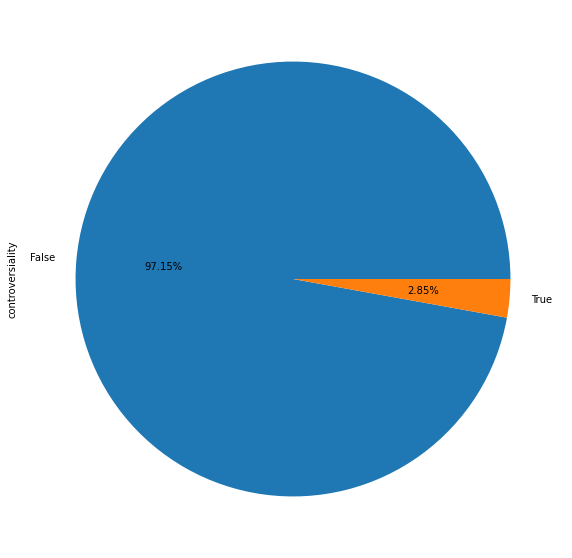

In [14]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [15]:
df['stickied'] = df['stickied'].replace(0,False)
#df['stickied'] = df['stickied'].replace(1,True)

False    244821
Name: stickied, dtype: int64


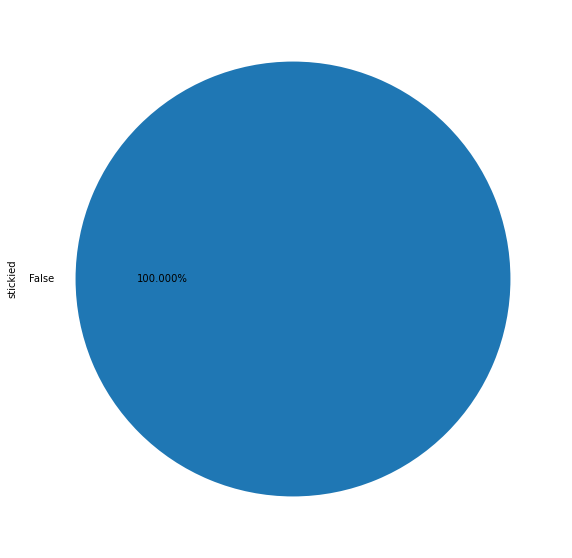

In [16]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["stickied"].value_counts())

# Link_id

t3_9worjk    6383
t3_9t6ckc    5089
t3_a03zh9    4555
t3_9xk31d    3982
t3_9xbplh    3538
             ... 
t3_9y8dum       1
t3_9y8nwm       1
t3_9y8n7n       1
t3_9y8t1b       1
t3_a1xk05       1
Name: link_id, Length: 18227, dtype: int64


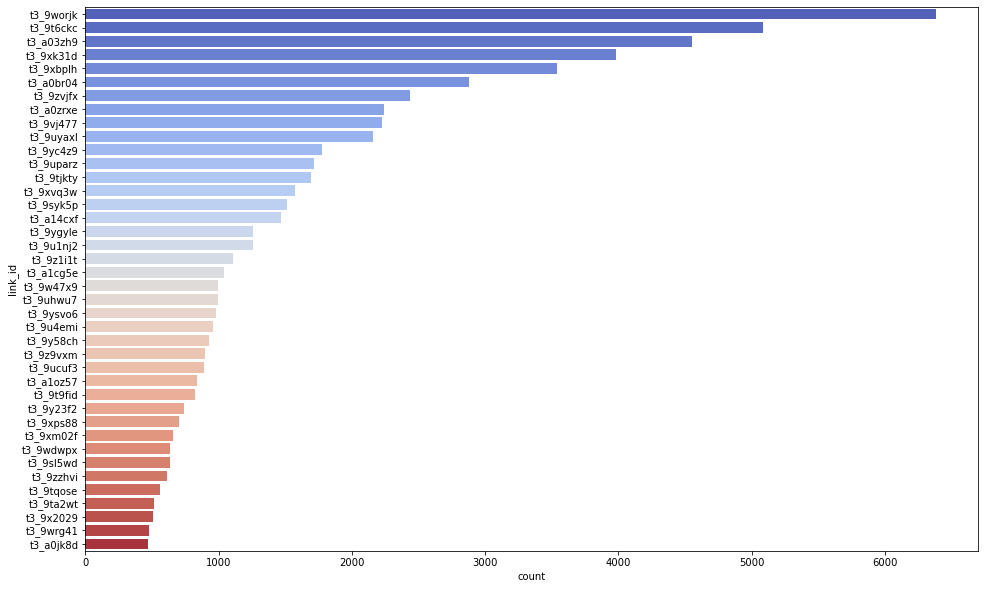

In [17]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [18]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 18227


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

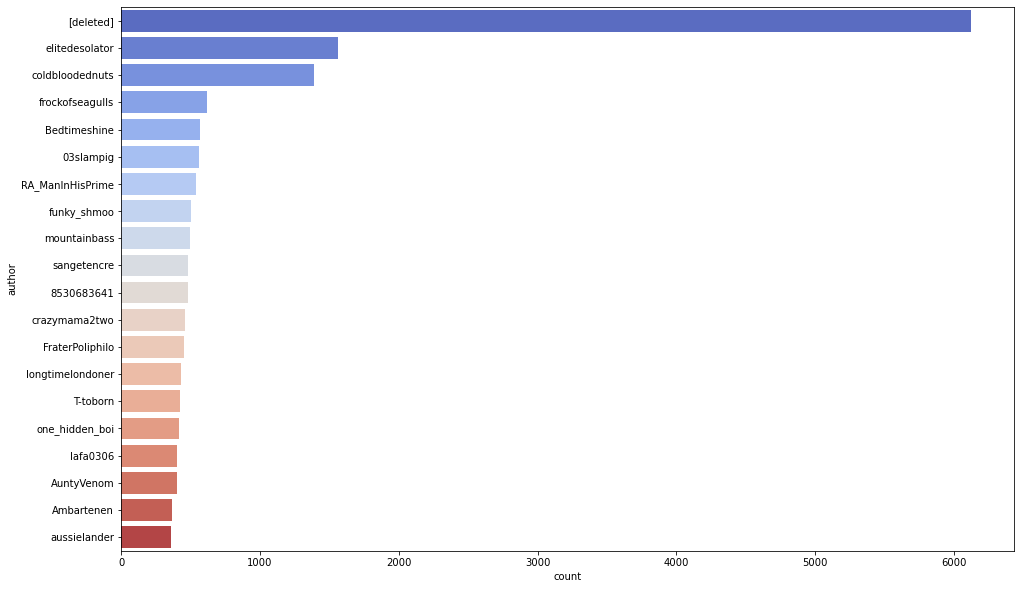

In [19]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

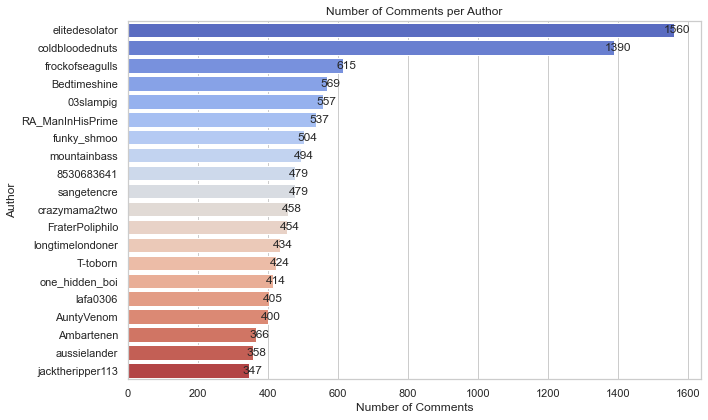

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [21]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 60716


In [22]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 13.43


In [23]:
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 4.03


# Hours

([<matplotlib.axis.XTick at 0x7ff46b0827f0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

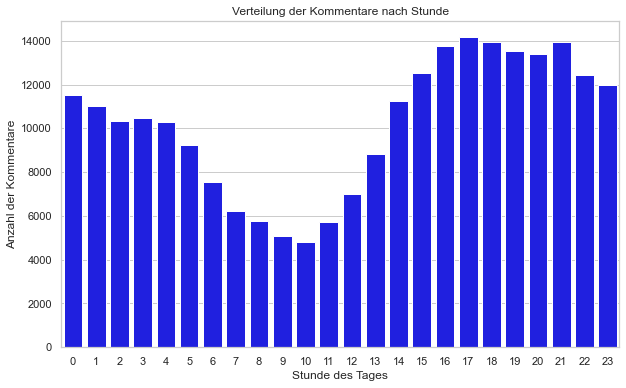

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

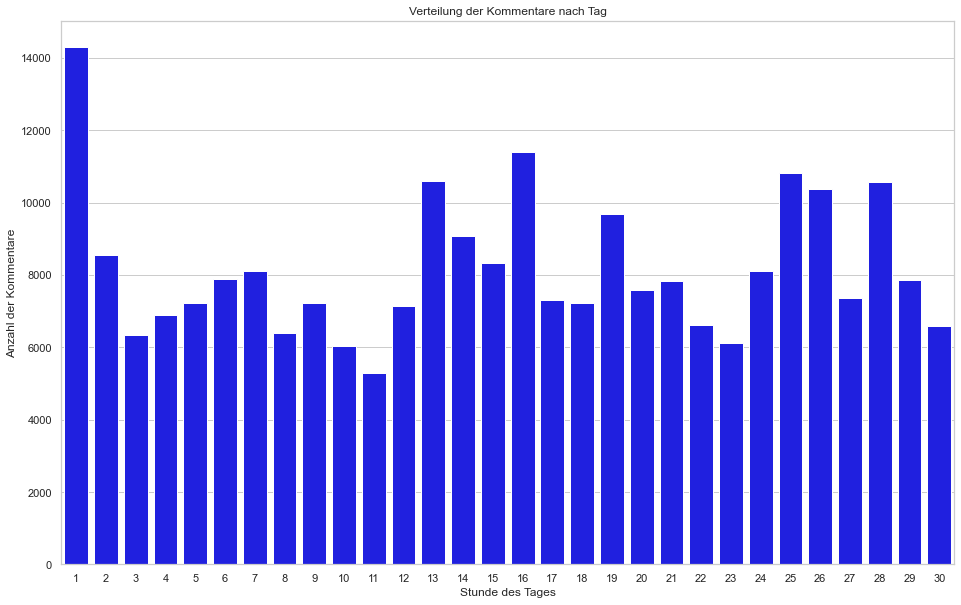

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    244766
1        50
3         2
2         2
4         1
Name: gilded, dtype: int64


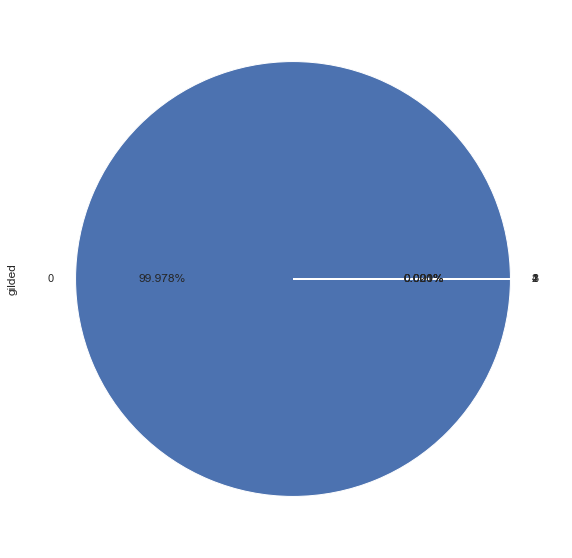

In [27]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["gilded"].value_counts())

# Distinguished

In [28]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False    244821
Name: distinguished, dtype: int64


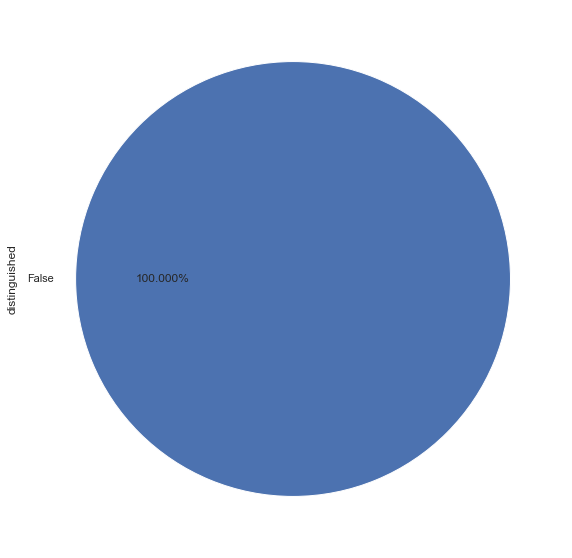

In [29]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [30]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    238630
True       6191
Name: edited, dtype: int64


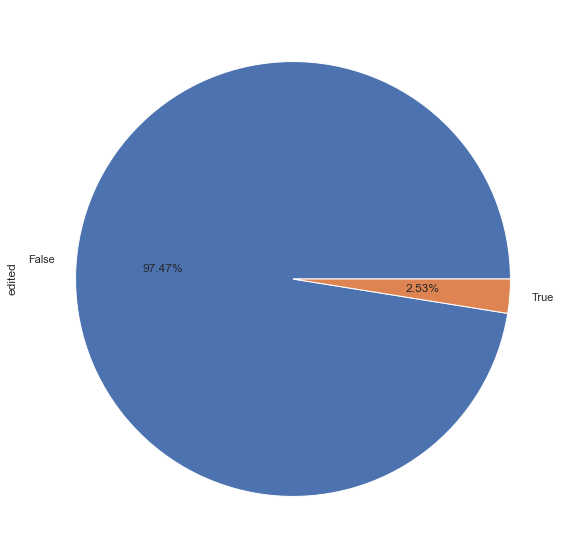

In [31]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [32]:
df["score"].mean()

12.413281540390734

In [33]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
193227,Wade_NYC,0,I think a brief period of irrationality might ...,False,2018-11-25 04:26:11,False,True,3,eaerl6i,t3_a03zh9,t3_a03zh9,57186,False,4,25,2018,I think a brief period of irrationality might ...,938
185280,HereWeGoAgainTJ,0,"This is beyond our pay-grade. Edit: Silver, Go...",False,2018-11-24 07:36:07,False,True,4,eacjs94,t3_9zvjfx,t3_9zvjfx,32439,False,7,24,2018,This is beyond our pay grade . Edit Silver Gol...,19
4863,scottsmith_brownsbur,0,Wait. Stop talking about the ring. You’re slee...,False,2018-11-01 12:53:48,False,False,1,e8ugbmk,t3_9t6ckc,t3_9t6ckc,31028,False,12,1,2018,Wait . Stop talking about the ring . You re sl...,125
184609,MajoryKeyInAMinor,0,"Bro, reddit can’t give you the professional co...",False,2018-11-24 04:44:57,False,False,0,eaccj61,t3_9zvjfx,t3_9zvjfx,20164,False,4,24,2018,Bro reddit can t give you the professional cou...,13
185977,Awkawardsilence,0,"I started pushing, but unsurprisingly found i...",False,2018-11-24 13:01:27,False,False,1,eacv189,t3_9zvjfx,t3_9zvjfx,18886,False,13,24,2018,I started pushing but unsurprisingly found it ...,25
184601,SuperGRB,0,Glad you used a throwaway account. I am sure n...,False,2018-11-24 04:42:01,False,True,0,eaccdpg,t3_9zvjfx,t3_9zvjfx,18847,False,4,24,2018,Glad you used a throwaway account . I am sure ...,27
94492,rugby_shirt,0,Move on Edit to add: holy shit. 9K votes LOL. ...,False,2018-11-13 12:50:37,False,True,0,e9m4bub,t3_9worjk,t3_9worjk,17987,False,12,13,2018,Move on Edit to add holy shit . K votes LOL . ...,75
193920,MollFlanders,0,This is the most empathetic response.,False,2018-11-25 06:28:08,False,False,0,eaey9f6,t3_a03zh9,t1_eaerl6i,15286,False,6,25,2018,This is the most empathetic response .,7
54311,blinkingsandbeepings,0,What’s especially fucked up about this is that...,False,2018-11-07 12:12:17,False,False,1,e97zc3n,t3_9uyaxl,t3_9uyaxl,14781,False,12,7,2018,What s especially fucked up about this is that...,39
146596,theskipster,40s Male,"So, moving away from all of my friends and fa...",False,2018-11-19 03:25:14,False,False,0,ea0hyjx,t3_9yc4z9,t3_9yc4z9,13980,False,3,19,2018,So moving away from all of my friends and fami...,87


In [34]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
114689,skagglet,0,No is not black and white when it comes to a r...,False,2018-11-15 15:03:37,False,False,0,e9r01yw,t3_9xbplh,t1_e9qy45e,-463,False,15,15,2018,No is not black and white when it comes to a r...,13
93333,esauter,0,What did you love most about him? For better o...,False,2018-11-13 05:21:36,False,False,0,e9loxlr,t3_9wjih2,t1_e9l4gvb,-318,False,5,13,2018,What did you love most about him For better or...,73
150379,formerlyadjacent,0,Should be charged as fraud tbh.,False,2018-11-19 15:40:29,False,False,0,ea1ecp9,t3_9ygyle,t1_ea1cyr7,-302,False,15,19,2018,Should be charged as fraud tbh .,7
137275,trooper_an,0,The most stupid advice I have ever seen.,False,2018-11-17 21:20:17,False,False,0,e9wv0q0,t3_9xxvfm,t1_e9w6o5o,-263,False,21,17,2018,The most stupid advice I have ever seen .,9
81899,dyslogistic,0,Regarding tattoos I don't think getting a tatt...,False,2018-11-11 15:37:10,False,True,0,e9hh9s7,t3_9w47x9,t1_e9hf8ek,-219,False,15,11,2018,Regarding tattoos I don t think getting a tatt...,178
34111,RonTheBagelHog,0,He did a really bad thing. I don't think that ...,False,2018-11-04 18:22:28,False,False,0,e91ndg9,t3_9u4emi,t1_e91ctwt,-207,False,18,4,2018,He did a really bad thing . I don t think that...,136
94601,remojackason,0,He's an idiot and you're a whore. Go be swinge...,True,2018-11-13 13:21:47,False,False,0,e9m5qz1,t3_9worjk,t3_9worjk,-196,False,13,13,2018,He s an idiot and you re a whore . Go be swing...,42
7056,FitQuantity,0,Can I ask what you hope to accomplish with an ...,False,2018-11-01 15:29:53,False,False,0,e8uq95c,t3_9sl5wd,t1_e8rqlaz,-189,False,15,1,2018,Can I ask what you hope to accomplish with an ...,14
37146,MeioZoro,Late 20s Male,I think it is really an abuse of your power to...,False,2018-11-05 02:17:24,False,True,0,e92m3dl,t3_9u4emi,t1_e92iten,-187,False,2,5,2018,I think it is really an abuse of your power to...,139
37529,PM_ME_UR_TITS4RATING,0,No. The sex was consensual.,False,2018-11-05 03:14:54,False,False,0,e92pyej,t3_9u4emi,t1_e92nuoh,-186,False,3,5,2018,No . The sex was consensual .,7


# Score vs hours on comments

<AxesSubplot:xlabel='created_hour', ylabel='score'>

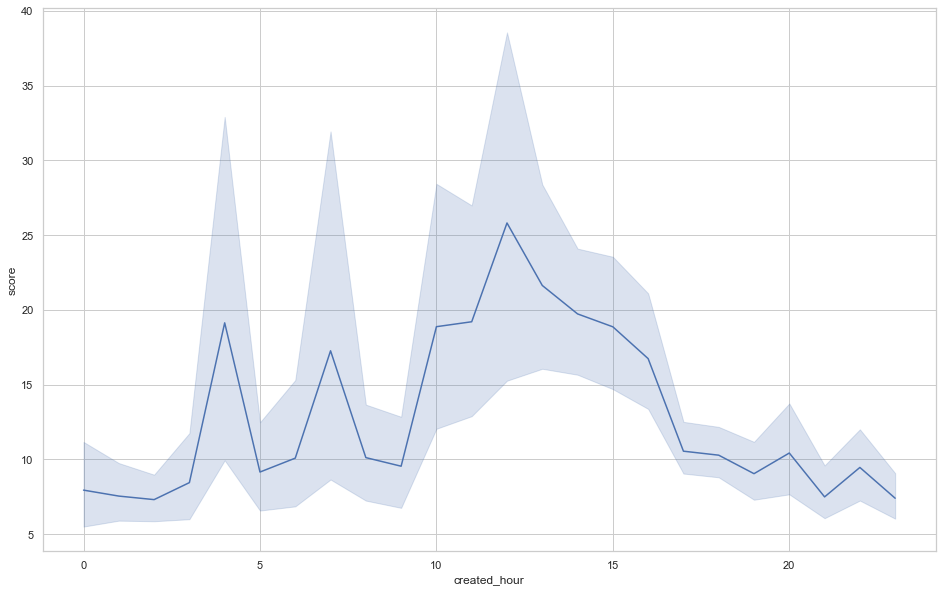

In [35]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs score on Comments

<AxesSubplot:xlabel='created_day', ylabel='score'>

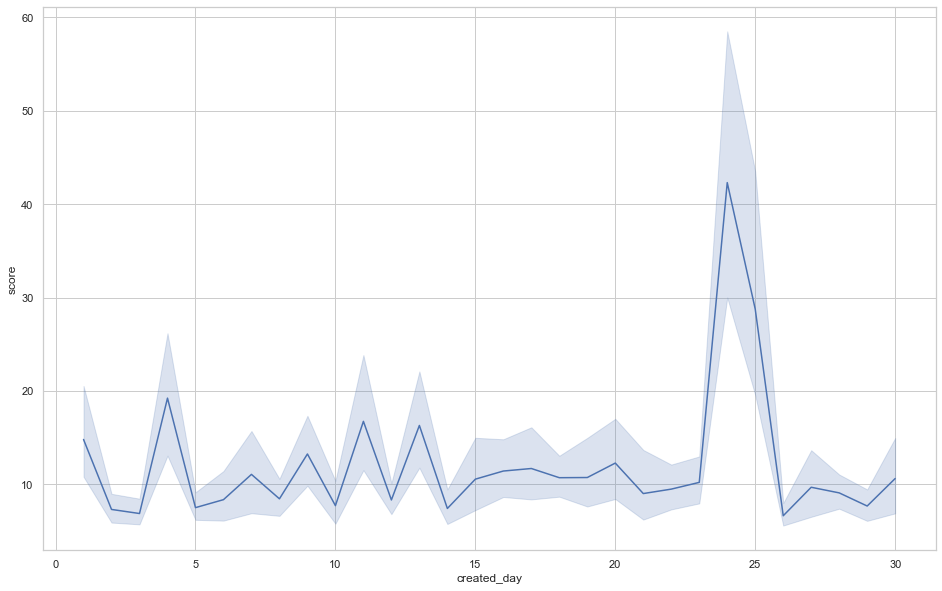

In [36]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

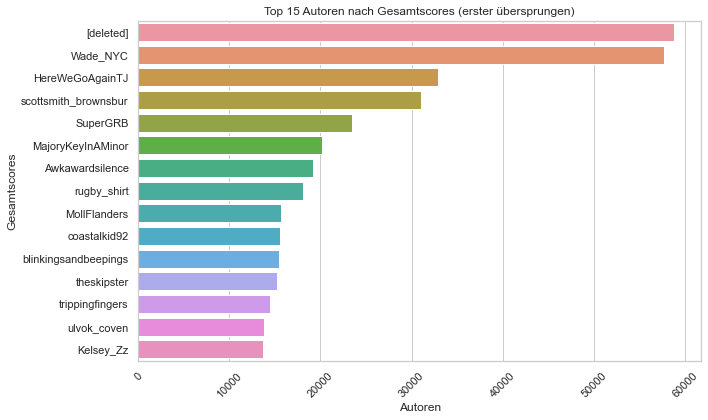

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[:15]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

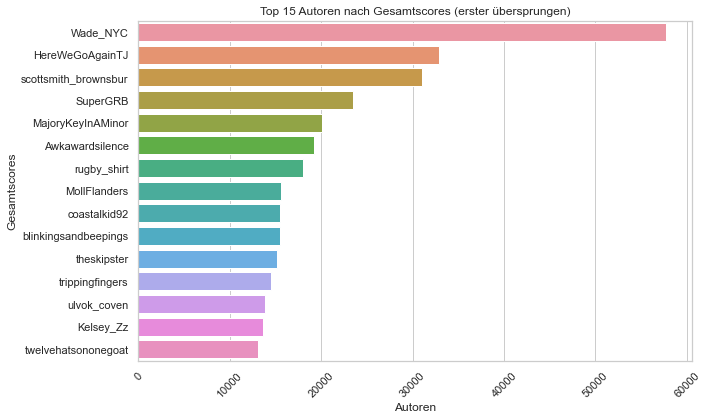

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den Autor "[deleted]" aus der sortierten Liste entfernen
sorted_authors = sorted_authors[sorted_authors.index != "[deleted]"]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
df.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,244821.000000,244821.000000,244821.000000,244821.000000,244821.0,244821.000000
mean,0.000261,12.413282,12.524003,15.547960,2018.0,58.155979
std,0.019383,238.797333,7.313267,8.820023,0.0,73.755741
min,0.000000,-463.000000,0.000000,1.000000,2018.0,1.000000
25%,0.000000,1.000000,5.000000,8.000000,2018.0,15.000000
50%,0.000000,2.000000,14.000000,16.000000,2018.0,35.000000
75%,0.000000,3.000000,19.000000,24.000000,2018.0,74.000000
max,4.000000,57186.000000,23.000000,30.000000,2018.0,2006.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244821 entries, 0 to 245194
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             244821 non-null  object
 1   author_flair_text  244821 non-null  object
 2   body               244821 non-null  object
 3   controversiality   244821 non-null  bool  
 4   created_utc        244821 non-null  object
 5   distinguished      244821 non-null  bool  
 6   edited             244821 non-null  bool  
 7   gilded             244821 non-null  int64 
 8   id                 244821 non-null  object
 9   link_id            244821 non-null  object
 10  parent_id          244821 non-null  object
 11  score              244821 non-null  int64 
 12  stickied           244821 non-null  bool  
 13  created_hour       244821 non-null  int64 
 14  created_day        244821 non-null  int64 
 15  created_year       244821 non-null  int64 
 16  clean_text         2

# Save cleaned general data

In [41]:
df.to_csv("relationship_advise_18_comments_EDA_clean.csv",index=False,sep=";")

In [42]:
import pandas as pd
df_new=pd.read_csv("relationship_advise_18_comments_EDA_clean.csv",sep=";")

In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244821 entries, 0 to 244820
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             244821 non-null  object
 1   author_flair_text  244821 non-null  object
 2   body               244821 non-null  object
 3   controversiality   244821 non-null  bool  
 4   created_utc        244821 non-null  object
 5   distinguished      244821 non-null  bool  
 6   edited             244821 non-null  bool  
 7   gilded             244821 non-null  int64 
 8   id                 244821 non-null  object
 9   link_id            244821 non-null  object
 10  parent_id          244821 non-null  object
 11  score              244821 non-null  int64 
 12  stickied           244821 non-null  bool  
 13  created_hour       244821 non-null  int64 
 14  created_day        244821 non-null  int64 
 15  created_year       244821 non-null  int64 
 16  clean_text         2

False    244821
Name: stickied, dtype: int64


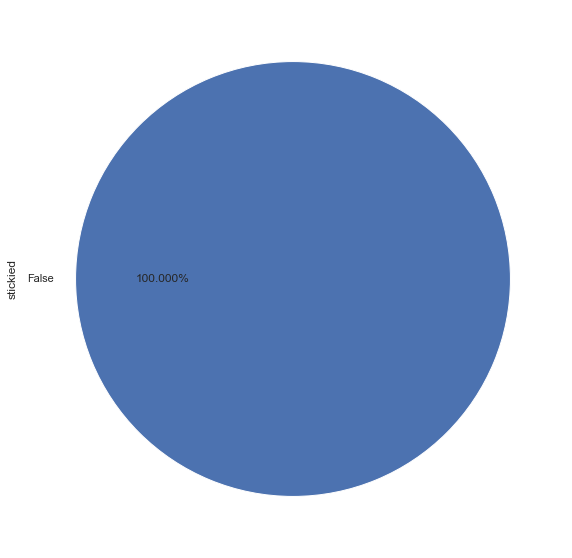

In [44]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df_new["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df_new["stickied"].value_counts())